In [57]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [75]:
#učitavanje podataka
tourney_detailed_results = pd.read_csv("tourney_detailed_results.csv")
teams = pd.read_csv("teams.csv")
seasons = pd.read_csv("seasons.csv")
sample_submission = pd.read_csv("sample_submission.csv")
tourney_results = pd.read_csv("tourney_results.csv")
tourney_seeds = pd.read_csv("tourney_seeds.csv")
tourney_slots = pd.read_csv("tourney_slots.csv")
regular_season_results = pd.read_csv("regular_season_compact_results.csv")
regular_season_detailed_results = pd.read_csv("regular_season_detailed_results.csv")

In [145]:
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(sample_submission)

,id,pred
0,S_507_509,0
1,S_507_511,0
2,S_507_512,0
3,S_507_521,0
4,S_507_536,0
5,S_507_538,0
6,S_507_549,0
7,S_507_553,0
8,S_507_556,0
9,S_507_559,0


In [60]:
teams.head()

,team_id,team_name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


In [61]:
regular_season_detailed_2011_2014 = pd.DataFrame()
regular_season_detailed_2011_2014 = regular_season_detailed_results[((regular_season_detailed_results['season'] >= 2011) & (regular_season_detailed_results['season'] < 2015))]
display(regular_season_detailed_2011_2014)

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
39337,2011,7,1228,79,1414,65,H,0,29,58,...,20,14,22,11,26,12,14,7,1,21
39338,2011,7,1268,105,1370,76,H,0,35,62,...,16,17,22,18,16,11,27,18,1,31
39339,2011,7,1338,83,1348,75,H,0,29,64,...,32,13,16,10,21,16,17,7,6,25
39340,2011,7,1400,83,1298,52,H,0,30,59,...,23,10,18,8,22,8,16,5,5,24
39341,2011,9,1228,84,1405,45,H,0,37,64,...,12,10,19,6,17,9,23,6,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60513,2014,132,1196,61,1246,60,N,0,23,53,...,11,21,26,12,24,9,12,4,8,19
60514,2014,132,1277,69,1276,55,N,0,27,54,...,23,15,16,13,15,7,9,3,3,15
60515,2014,132,1386,65,1433,61,N,0,24,50,...,19,8,15,13,25,9,5,6,6,18
60516,2014,132,1418,82,1209,81,N,1,32,75,...,19,20,21,4,26,8,7,5,7,15


In [62]:
tourney_detailed_results_2011_2013 = pd.DataFrame()
tourney_detailed_results_2011_2013 = tourney_detailed_results[((tourney_detailed_results['season'] >= 2011) & (tourney_detailed_results['season'] < 2015))]
display(tourney_detailed_results_2011_2013)

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
512,2011,134,1155,70,1412,52,N,0,26,50,...,24,4,7,7,22,10,19,4,3,10
513,2011,134,1421,81,1114,77,N,1,27,54,...,29,20,26,7,26,19,16,6,2,24
514,2011,135,1427,70,1106,61,N,0,23,54,...,26,10,12,11,28,13,12,6,3,22
515,2011,135,1433,59,1425,46,N,0,20,59,...,9,15,25,5,26,4,15,2,6,20
516,2011,136,1139,60,1330,58,N,0,22,54,...,15,21,27,13,16,8,15,9,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2014,146,1163,60,1277,54,N,0,17,49,...,29,7,8,6,26,13,16,5,3,16
776,2014,146,1246,75,1276,72,N,0,31,58,...,18,11,14,14,10,11,7,4,1,14
777,2014,152,1163,63,1196,53,N,0,24,43,...,10,14,20,12,15,3,11,3,1,14
778,2014,152,1246,74,1458,73,N,0,29,58,...,20,19,20,6,21,11,8,4,3,18


In [63]:
tourney_regular_season_combined = pd.concat([regular_season_detailed_2011_2014, tourney_detailed_results_2011_2013])
display(tourney_regular_season_combined)

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
39337,2011,7,1228,79,1414,65,H,0,29,58,...,20,14,22,11,26,12,14,7,1,21
39338,2011,7,1268,105,1370,76,H,0,35,62,...,16,17,22,18,16,11,27,18,1,31
39339,2011,7,1338,83,1348,75,H,0,29,64,...,32,13,16,10,21,16,17,7,6,25
39340,2011,7,1400,83,1298,52,H,0,30,59,...,23,10,18,8,22,8,16,5,5,24
39341,2011,9,1228,84,1405,45,H,0,37,64,...,12,10,19,6,17,9,23,6,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2014,146,1163,60,1277,54,N,0,17,49,...,29,7,8,6,26,13,16,5,3,16
776,2014,146,1246,75,1276,72,N,0,31,58,...,18,11,14,14,10,11,7,4,1,14
777,2014,152,1163,63,1196,53,N,0,24,43,...,10,14,20,12,15,3,11,3,1,14
778,2014,152,1246,74,1458,73,N,0,29,58,...,20,19,20,6,21,11,8,4,3,18


In [64]:
data_2011 = tourney_regular_season_combined[tourney_regular_season_combined['season'] == 2011]
data_2012 = tourney_regular_season_combined[tourney_regular_season_combined['season'] == 2012]
data_2013 = tourney_regular_season_combined[tourney_regular_season_combined['season'] == 2013]
data_2014 = tourney_regular_season_combined[tourney_regular_season_combined['season'] == 2014]
display(data_2011)

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot,wfgm,wfga,...,lfga3,lftm,lfta,lor,ldr,last,lto,lstl,lblk,lpf
39337,2011,7,1228,79,1414,65,H,0,29,58,...,20,14,22,11,26,12,14,7,1,21
39338,2011,7,1268,105,1370,76,H,0,35,62,...,16,17,22,18,16,11,27,18,1,31
39339,2011,7,1338,83,1348,75,H,0,29,64,...,32,13,16,10,21,16,17,7,6,25
39340,2011,7,1400,83,1298,52,H,0,30,59,...,23,10,18,8,22,8,16,5,5,24
39341,2011,9,1228,84,1405,45,H,0,37,64,...,12,10,19,6,17,9,23,6,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,2011,146,1246,76,1314,69,N,0,27,56,...,16,12,15,11,25,13,13,9,5,17
575,2011,146,1433,71,1242,61,N,0,21,53,...,21,15,28,19,26,10,14,8,6,20
576,2011,152,1139,70,1433,62,N,0,21,59,...,22,8,13,6,26,17,10,3,4,24
577,2011,152,1163,56,1246,55,N,0,23,49,...,27,4,12,15,22,12,10,11,3,12


In [76]:
wp = []
all_opponents = []
teams_opponents_won = []
teams_opponents_lost = []
total_points = []
total_blocks = []
total_steals = []
field_goal_percentage = []
for i, row1 in teams.iterrows():
    wonCnt = 0
    playedCnt = 0
    opponents = []
    opponents_won = []
    opponents_lost = []
    points = 0
    blocks = 0
    steals = 0
    made = 0
    attempted = 0
    for j, row2 in data_2011.iterrows():
        if row1['team_id'] == row2['wteam']:
            opponents.append(row2['lteam'])
            wonCnt = wonCnt + 1
            playedCnt = playedCnt + 1
            points = points + row2['wscore']
            blocks = blocks + row2['wblk']
            steals = steals + row2['wstl']
            made = made + row2['wfgm']
            attempted = attempted + row2['wfga']
            opponents_won.append(row2['lteam'])
        if row1['team_id'] == row2['lteam']:
            opponents.append(row2['wteam'])
            playedCnt = playedCnt + 1
            points = points + row2['lscore']
            blocks = blocks + row2['lblk']
            steals = steals + row2['lstl']
            made = made + row2['lfgm']
            attempted = attempted + row2['lfga']
            opponents_lost.append(row2['wteam'])
    total_points.append(points)
    total_blocks.append(blocks)
    total_steals.append(steals)
    teams_opponents_won.append(opponents_won)
    teams_opponents_lost.append(opponents_lost)
    all_opponents.append(opponents)
    if attempted == 0:
        attempted = 1
    field_goal_percentage.append(made / attempted)
    if playedCnt == 0:
        playedCnt = 1
    wp.append(wonCnt / playedCnt)
teams['wp_2011'] = wp
teams['all_opponents_2011'] = all_opponents
teams['opponents_won_2011'] = teams_opponents_won
teams['opponents_lost_2011'] = teams_opponents_lost
teams["total_points_2011"] = total_points
teams["total_blocks_2011"] = total_blocks
teams["total_steals_2011"] = total_steals
teams["field_goal_percentage_2011"] = field_goal_percentage
display(teams)

,team_id,team_name,wp_2011,all_opponents_2011,opponents_won_2011,opponents_lost_2011,total_points_2011,total_blocks_2011,total_steals_2011,field_goal_percentage_2011
0,1101,Abilene Chr,0.000000,[],[],[],0,0,0,0.000000
1,1102,Air Force,0.500000,"[1398, 1459, 1169, 1191, 1460, 1300, 1115, 131...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...",1799,71,174,0.468657
2,1103,Akron,0.628571,"[1173, 1464, 1156, 1178, 1227, 1396, 1278, 112...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...",2435,120,225,0.427576
3,1104,Alabama,0.656250,"[1197, 1407, 1371, 1234, 1389, 1105, 1375, 134...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...",2133,167,296,0.444941
4,1105,Alabama A&M,0.400000,"[1443, 1104, 1398, 1455, 1412, 1301, 1212, 123...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...",1570,132,214,0.397133
...,...,...,...,...,...,...,...,...,...,...
359,1460,Wright St,0.548387,"[1231, 1380, 1324, 1350, 1356, 1153, 1178, 110...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...",1988,33,192,0.428480
360,1461,Wyoming,0.275862,"[1294, 1316, 1442, 1281, 1344, 1377, 1232, 141...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...",1872,110,213,0.424125
361,1462,Xavier,0.750000,"[1444, 1236, 1234, 1371, 1330, 1459, 1275, 113...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]",2306,98,174,0.461176
362,1463,Yale,0.518519,"[1346, 1344, 1130, 1228, 1119, 1216, 1436, 110...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...",1823,122,125,0.438596


In [77]:
wp = []
all_opponents = []
teams_opponents_won = []
teams_opponents_lost = []
total_points = []
total_blocks = []
total_steals = []
field_goal_percentage = []
for i, row1 in teams.iterrows():
    wonCnt = 0
    playedCnt = 0
    opponents = []
    opponents_won = []
    opponents_lost = []
    points = 0
    blocks = 0
    steals = 0
    made = 0
    attempted = 0
    for j, row2 in data_2012.iterrows():
        if row1['team_id'] == row2['wteam']:
            opponents.append(row2['lteam'])
            wonCnt = wonCnt + 1
            playedCnt = playedCnt + 1
            points = points + row2['wscore']
            blocks = blocks + row2['wblk']
            steals = steals + row2['wstl']
            made = made + row2['wfgm']
            attempted = attempted + row2['wfga']
            opponents_won.append(row2['lteam'])
        if row1['team_id'] == row2['lteam']:
            opponents.append(row2['wteam'])
            playedCnt = playedCnt + 1
            points = points + row2['lscore']
            blocks = blocks + row2['lblk']
            steals = steals + row2['lstl']
            made = made + row2['lfgm']
            attempted = attempted + row2['lfga']
            opponents_lost.append(row2['wteam'])
    total_points.append(points)
    total_blocks.append(blocks)
    total_steals.append(steals)
    all_opponents.append(opponents)
    teams_opponents_won.append(opponents_won)
    teams_opponents_lost.append(opponents_lost)
    if attempted == 0:
        attempted = 1
    field_goal_percentage.append(made / attempted)
    if playedCnt == 0:
        playedCnt = 1
    wp.append(wonCnt / playedCnt)
teams['wp_2012'] = wp
teams['all_opponents_2012'] = all_opponents
teams['opponents_won_2012'] = teams_opponents_won
teams['opponents_lost_2012'] = teams_opponents_lost
teams["total_points_2012"] = total_points
teams["total_blocks_2012"] = total_blocks
teams["total_steals_2012"] = total_steals
teams["field_goal_percentage_2012"] = field_goal_percentage
display(teams)

,team_id,team_name,wp_2011,all_opponents_2011,opponents_won_2011,opponents_lost_2011,total_points_2011,total_blocks_2011,total_steals_2011,field_goal_percentage_2011,wp_2012,all_opponents_2012,opponents_won_2012,opponents_lost_2012,total_points_2012,total_blocks_2012,total_steals_2012,field_goal_percentage_2012
0,1101,Abilene Chr,0.000000,[],[],[],0,0,0,0.000000,0.000000,[],[],[],0,0,0,0.000000
1,1102,Air Force,0.500000,"[1398, 1459, 1169, 1191, 1460, 1300, 1115, 131...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...",1799,71,174,0.468657,0.407407,"[1119, 1440, 1160, 1179, 1460, 1115, 1271, 121...","[1119, 1440, 1460, 1115, 1271, 1185, 1152, 141...","[1160, 1179, 1211, 1447, 1461, 1361, 1395, 142...",1638,80,169,0.444444
2,1103,Akron,0.628571,"[1173, 1464, 1156, 1178, 1227, 1396, 1278, 112...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...",2435,120,225,0.427576,0.656250,"[1280, 1434, 1182, 1178, 1452, 1292, 1156, 111...","[1280, 1178, 1115, 1197, 1464, 1299, 1267, 127...","[1434, 1182, 1452, 1292, 1156, 1433, 1138, 133...",2287,138,234,0.461229
3,1104,Alabama,0.656250,"[1197, 1407, 1371, 1234, 1389, 1105, 1375, 134...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...",2133,167,296,0.444941,0.636364,"[1316, 1324, 1268, 1455, 1345, 1105, 1433, 120...","[1316, 1324, 1268, 1455, 1345, 1105, 1433, 117...","[1207, 1173, 1243, 1280, 1435, 1246, 1376, 126...",2135,137,239,0.451800
4,1105,Alabama A&M,0.400000,"[1443, 1104, 1398, 1455, 1412, 1301, 1212, 123...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...",1570,132,214,0.397133,0.192308,"[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123...","[1115, 1108, 1341, 1108, 1238]","[1408, 1104, 1375, 1276, 1210, 1398, 1412, 123...",1589,104,160,0.402570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1460,Wright St,0.548387,"[1231, 1380, 1324, 1350, 1356, 1153, 1178, 110...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...",1988,33,192,0.428480,0.387097,"[1326, 1238, 1196, 1316, 1150, 1156, 1464, 110...","[1238, 1464, 1275, 1225, 1141, 1260, 1227, 143...","[1326, 1196, 1316, 1150, 1156, 1102, 1153, 132...",1777,50,203,0.396825
360,1461,Wyoming,0.275862,"[1294, 1316, 1442, 1281, 1344, 1377, 1232, 141...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...",1872,110,213,0.424125,0.620690,"[1294, 1453, 1377, 1340, 1271, 1256, 1430, 113...","[1294, 1377, 1340, 1271, 1256, 1430, 1133, 116...","[1453, 1176, 1307, 1361, 1395, 1307, 1102, 116...",1809,95,192,0.445956
361,1462,Xavier,0.750000,"[1444, 1236, 1234, 1371, 1330, 1459, 1275, 113...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]",2306,98,174,0.461176,0.638889,"[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1288, 1236, 1275, 1208, 1435, 1345, 1139, 115...","[1331, 1253, 1218, 1211, 1247, 1173, 1387, 127...",2543,135,216,0.452897
362,1463,Yale,0.518519,"[1346, 1344, 1130, 1228, 1119, 1216, 1436, 110...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...",1823,122,125,0.438596,0.653846,"[1148, 1346, 1371, 1119, 1216, 1436, 1357, 113...","[1148, 1119, 1216, 1436, 1357, 1136, 1348, 122...","[1346, 1371, 1448, 1196, 1217, 1165, 1217, 134...",1733,95,134,0.424818


In [78]:
wp = []
all_opponents = []
teams_opponents_won = []
teams_opponents_lost = []
total_points = []
total_blocks = []
total_steals = []
field_goal_percentage = []
for i, row1 in teams.iterrows():
    wonCnt = 0
    playedCnt = 0
    opponents = []
    opponents_won = []
    opponents_lost = []
    points = 0
    blocks = 0
    steals = 0
    made = 0
    attempted = 0
    for j, row2 in data_2013.iterrows():
        if row1['team_id'] == row2['wteam']:
            opponents.append(row2['lteam'])
            wonCnt = wonCnt + 1
            playedCnt = playedCnt + 1
            points = points + row2['wscore']
            blocks = blocks + row2['wblk']
            steals = steals + row2['wstl']
            made = made + row2['wfgm']
            attempted = attempted + row2['wfga']
            opponents_won.append(row2['lteam'])
        if row1['team_id'] == row2['lteam']:
            opponents.append(row2['wteam'])
            playedCnt = playedCnt + 1
            points = points + row2['lscore']
            blocks = blocks + row2['lblk']
            steals = steals + row2['lstl']
            made = made + row2['lfgm']
            attempted = attempted + row2['lfga']
            opponents_lost.append(row2['wteam'])
    total_points.append(points)
    total_blocks.append(blocks)
    total_steals.append(steals)
    all_opponents.append(opponents)
    teams_opponents_won.append(opponents_won)
    teams_opponents_lost.append(opponents_lost)
    if attempted == 0:
        attempted = 1
    field_goal_percentage.append(made / attempted)
    if playedCnt == 0:
        playedCnt = 1
    wp.append(wonCnt / playedCnt)
teams['wp_2013'] = wp
teams['all_opponents_2013'] = all_opponents 
teams['opponents_won_2013'] = teams_opponents_won
teams['opponents_lost_2013'] = teams_opponents_lost
teams["total_points_2013"] = total_points
teams["total_blocks_2013"] = total_blocks
teams["total_steals_2013"] = total_steals
teams["field_goal_percentage_2013"] = field_goal_percentage
display(teams)

,team_id,team_name,wp_2011,all_opponents_2011,opponents_won_2011,opponents_lost_2011,total_points_2011,total_blocks_2011,total_steals_2011,field_goal_percentage_2011,...,total_steals_2012,field_goal_percentage_2012,wp_2013,all_opponents_2013,opponents_won_2013,opponents_lost_2013,total_points_2013,total_blocks_2013,total_steals_2013,field_goal_percentage_2013
0,1101,Abilene Chr,0.000000,[],[],[],0,0,0,0.000000,...,0,0.000000,0.000000,[],[],[],0,0,0,0.000000
1,1102,Air Force,0.500000,"[1398, 1459, 1169, 1191, 1460, 1300, 1115, 131...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...",1799,71,174,0.468657,...,169,0.444444,0.535714,"[1119, 1154, 1286, 1160, 1238, 1455, 1115, 141...","[1119, 1154, 1286, 1238, 1115, 1415, 1305, 112...","[1160, 1455, 1196, 1350, 1424, 1161, 1307, 130...",1930,48,174,0.471034
2,1103,Akron,0.628571,"[1173, 1464, 1156, 1178, 1227, 1396, 1278, 112...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...",2435,120,225,0.427576,...,234,0.461229,0.781250,"[1157, 1329, 1421, 1336, 1292, 1166, 1178, 111...","[1421, 1336, 1292, 1115, 1156, 1411, 1343, 116...","[1157, 1329, 1166, 1178, 1138, 1245, 1433]",2272,179,223,0.450221
3,1104,Alabama,0.656250,"[1197, 1407, 1371, 1234, 1389, 1105, 1375, 134...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...",2133,167,296,0.444941,...,239,0.451800,0.625000,"[1355, 1333, 1437, 1149, 1249, 1153, 1173, 143...","[1355, 1333, 1437, 1149, 1249, 1403, 1324, 139...","[1153, 1173, 1433, 1273, 1408, 1281, 1397, 112...",2003,143,263,0.428571
4,1105,Alabama A&M,0.400000,"[1443, 1104, 1398, 1455, 1412, 1301, 1212, 123...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...",1570,132,214,0.397133,...,160,0.402570,0.310345,"[1235, 1240, 1191, 1398, 1273, 1435, 1283, 111...","[1283, 1280, 1212, 1238, 1106, 1290, 1108, 121...","[1235, 1240, 1191, 1398, 1273, 1435, 1116, 129...",1786,97,159,0.394296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1460,Wright St,0.548387,"[1231, 1380, 1324, 1350, 1356, 1153, 1178, 110...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...",1988,33,192,0.428480,...,203,0.396825,0.625000,"[1225, 1183, 1299, 1141, 1226, 1428, 1287, 113...","[1225, 1183, 1299, 1226, 1287, 1440, 1220, 127...","[1141, 1428, 1132, 1153, 1434, 1464, 1227, 117...",1977,63,239,0.433313
360,1461,Wyoming,0.275862,"[1294, 1316, 1442, 1281, 1344, 1377, 1232, 141...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...",1872,110,213,0.424125,...,192,0.445956,0.566667,"[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1300, 1377, 1380, 1294, 1167, 1364, 1160, 122...","[1129, 1201, 1424, 1102, 1307, 1161, 1129, 136...",1804,96,188,0.425191
361,1462,Xavier,0.750000,"[1444, 1236, 1234, 1371, 1330, 1459, 1275, 113...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]",2306,98,174,0.461176,...,216,0.452897,0.548387,"[1192, 1139, 1352, 1334, 1180, 1179, 1345, 143...","[1192, 1139, 1352, 1180, 1179, 1345, 1245, 139...","[1334, 1435, 1153, 1459, 1397, 1448, 1150, 138...",2021,86,164,0.456384
362,1463,Yale,0.518519,"[1346, 1344, 1130, 1228, 1119, 1216, 1436, 110...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...",1823,122,125,0.438596,...,134,0.424818,0.413793,"[1357, 1386, 1191, 1138, 1442, 1436, 1119, 121...","[1138, 1119, 1136, 1221, 1135, 1335, 1343, 116...","[1357, 1386, 1191, 1442, 1436, 1216, 1306, 130...",1863,84,179,0.411333


In [79]:
wp = []
all_opponents = []
teams_opponents_won = []
teams_opponents_lost = []
total_points = []
total_blocks = []
total_steals = []
field_goal_percentage = []
for i, row1 in teams.iterrows():
    wonCnt = 0
    playedCnt = 0
    opponents = []
    opponents_won = []
    opponents_lost = []
    points = 0
    blocks = 0
    steals = 0
    made = 0
    attempted = 0
    for j, row2 in data_2014.iterrows():
        if row1['team_id'] == row2['wteam']:
            opponents.append(row2['lteam'])
            wonCnt = wonCnt + 1
            playedCnt = playedCnt + 1
            points = points + row2['wscore']
            blocks = blocks + row2['wblk']
            steals = steals + row2['wstl']
            made = made + row2['wfgm']
            attempted = attempted + row2['wfga']
            opponents_won.append(row2['lteam'])
        if row1['team_id'] == row2['lteam']:
            opponents.append(row2['wteam'])
            playedCnt = playedCnt + 1
            points = points + row2['lscore']
            blocks = blocks + row2['lblk']
            steals = steals + row2['lstl']
            made = made + row2['lfgm']
            attempted = attempted + row2['lfga']
            opponents_lost.append(row2['wteam'])
    total_points.append(points)
    total_blocks.append(blocks)
    total_steals.append(steals)
    all_opponents.append(opponents)
    teams_opponents_won.append(opponents_won)
    teams_opponents_lost.append(opponents_lost)
    if attempted == 0:
        attempted = 1
    field_goal_percentage.append(made / attempted)
    if playedCnt == 0:
        playedCnt = 1
    wp.append(wonCnt / playedCnt)
teams['wp_2014'] = wp
teams['all_opponents_2014'] = all_opponents
teams['opponents_won_2014'] = teams_opponents_won
teams['opponents_lost_2014'] = teams_opponents_lost
teams["total_points_2014"] = total_points
teams["total_blocks_2014"] = total_blocks
teams["total_steals_2014"] = total_steals
teams["field_goal_percentage_2014"] = field_goal_percentage
display(teams)

,team_id,team_name,wp_2011,all_opponents_2011,opponents_won_2011,opponents_lost_2011,total_points_2011,total_blocks_2011,total_steals_2011,field_goal_percentage_2011,...,total_steals_2013,field_goal_percentage_2013,wp_2014,all_opponents_2014,opponents_won_2014,opponents_lost_2014,total_points_2014,total_blocks_2014,total_steals_2014,field_goal_percentage_2014
0,1101,Abilene Chr,0.000000,[],[],[],0,0,0,0.000000,...,0,0.000000,0.095238,"[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...","[1146, 1223]","[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...",1326,31,121,0.405508
1,1102,Air Force,0.500000,"[1398, 1459, 1169, 1191, 1460, 1300, 1115, 131...","[1398, 1459, 1169, 1191, 1300, 1115, 1358, 119...","[1460, 1319, 1431, 1140, 1424, 1361, 1161, 130...",1799,71,174,0.468657,...,174,0.471034,0.357143,"[1119, 1440, 1238, 1115, 1350, 1160, 1377, 141...","[1119, 1115, 1377, 1415, 1429, 1424, 1363, 136...","[1440, 1238, 1350, 1160, 1413, 1201, 1361, 116...",1808,83,148,0.425913
2,1103,Akron,0.628571,"[1173, 1464, 1156, 1178, 1227, 1396, 1278, 112...","[1464, 1178, 1227, 1126, 1114, 1391, 1115, 133...","[1173, 1156, 1396, 1278, 1274, 1325, 1138, 127...",2435,120,225,0.427576,...,223,0.450221,0.636364,"[1157, 1388, 1292, 1156, 1126, 1331, 1178, 133...","[1157, 1156, 1126, 1331, 1178, 1333, 1164, 126...","[1388, 1292, 1235, 1376, 1376, 1405, 1245, 144...",2241,139,218,0.431907
3,1104,Alabama,0.656250,"[1197, 1407, 1371, 1234, 1389, 1105, 1375, 134...","[1197, 1407, 1105, 1375, 1368, 1252, 1337, 140...","[1371, 1234, 1389, 1345, 1344, 1329, 1116, 143...",2133,167,296,0.444941,...,263,0.428571,0.387097,"[1328, 1403, 1209, 1181, 1180, 1316, 1378, 114...","[1403, 1209, 1316, 1149, 1352, 1435, 1280, 126...","[1328, 1181, 1180, 1378, 1455, 1462, 1417, 120...",2068,131,209,0.438356
4,1105,Alabama A&M,0.400000,"[1443, 1104, 1398, 1455, 1412, 1301, 1212, 123...","[1212, 1290, 1106, 1108, 1380, 1341, 1115, 110...","[1443, 1104, 1398, 1455, 1412, 1301, 1238, 111...",1570,132,214,0.397133,...,159,0.394296,0.428571,"[1307, 1444, 1184, 1240, 1398, 1325, 1283, 141...","[1398, 1238, 1212, 1290, 1411, 1341, 1290, 110...","[1307, 1444, 1184, 1240, 1325, 1283, 1412, 111...",1787,114,169,0.405514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1460,Wright St,0.548387,"[1231, 1380, 1324, 1350, 1356, 1153, 1178, 110...","[1380, 1324, 1102, 1141, 1275, 1454, 1453, 122...","[1231, 1350, 1356, 1153, 1178, 1150, 1434, 115...",1988,33,192,0.428480,...,239,0.433313,0.562500,"[1207, 1177, 1223, 1375, 1108, 1441, 1287, 129...","[1223, 1108, 1441, 1183, 1282, 1132, 1324, 143...","[1207, 1177, 1375, 1287, 1299, 1440, 1275, 117...",2127,94,215,0.449367
360,1461,Wyoming,0.275862,"[1294, 1316, 1442, 1281, 1344, 1377, 1232, 141...","[1442, 1232, 1176, 1147, 1244, 1307, 1395, 1102]","[1294, 1316, 1281, 1344, 1377, 1414, 1453, 116...",1872,110,213,0.424125,...,188,0.425191,0.533333,"[1404, 1160, 1117, 1238, 1377, 1326, 1286, 137...","[1404, 1117, 1238, 1377, 1286, 1377, 1294, 112...","[1160, 1326, 1176, 1374, 1305, 1307, 1201, 130...",1939,114,135,0.471861
361,1462,Xavier,0.750000,"[1444, 1236, 1234, 1371, 1330, 1459, 1275, 113...","[1444, 1236, 1234, 1371, 1459, 1139, 1448, 110...","[1330, 1275, 1211, 1196, 1153, 1150, 1173, 1266]",2306,98,174,0.461176,...,164,0.456384,0.617647,"[1205, 1397, 1287, 1275, 1101, 1234, 1397, 142...","[1205, 1397, 1287, 1275, 1101, 1132, 1191, 115...","[1234, 1397, 1425, 1166, 1344, 1371, 1437, 126...",2442,97,196,0.469730
362,1463,Yale,0.518519,"[1346, 1344, 1130, 1228, 1119, 1216, 1436, 110...","[1130, 1119, 1216, 1107, 1136, 1221, 1135, 113...","[1346, 1344, 1228, 1436, 1357, 1390, 1250, 133...",1823,122,125,0.438596,...,179,0.411333,0.518519,"[1148, 1163, 1353, 1357, 1273, 1248, 1216, 113...","[1148, 1357, 1248, 1216, 1306, 1135, 1162, 116...","[1163, 1353, 1273, 1136, 1344, 1107, 1387, 143...",1777,115,164,0.411079


In [133]:
owp = []
for i, row1 in teams.iterrows():
    firstPlayedCnt = 0
    sum = 0
    for x  in row1['all_opponents_2011']:
        secondPlayedCnt = 0
        won = 0
        firstPlayedCnt = firstPlayedCnt + 1
        for c in (teams[teams['team_id'] == x]['opponents_won_2011']):
            for y in c:
                if y != row1['team_id']:
                    won = won + 1
                    secondPlayedCnt = secondPlayedCnt + 1
        for b in teams[teams['team_id'] == x]['opponents_lost_2011']:
            for z in b:
                if z != row1['team_id']:
                    secondPlayedCnt = secondPlayedCnt + 1
        if secondPlayedCnt == 0:
            seconPlayedCnt = 1
        sum = sum + (won / secondPlayedCnt)
    if firstPlayedCnt == 0:
        firstPlayedCnt = 1
    owp.append(sum / firstPlayedCnt)
teams['owp_2011'] = owp

In [134]:
owp = []
for i, row1 in teams.iterrows():
    firstPlayedCnt = 0
    sum = 0
    for x  in row1['all_opponents_2012']:
        secondPlayedCnt = 0
        won = 0
        firstPlayedCnt = firstPlayedCnt + 1
        for c in (teams[teams['team_id'] == x]['opponents_won_2012']):
            for y in c:
                if y != row1['team_id']:
                    won = won + 1
                    secondPlayedCnt = secondPlayedCnt + 1
        for b in teams[teams['team_id'] == x]['opponents_lost_2012']:
            for z in b:
                if z != row1['team_id']:
                    secondPlayedCnt = secondPlayedCnt + 1
        if secondPlayedCnt == 0:
            seconPlayedCnt = 1
        sum = sum + (won / secondPlayedCnt)
    if firstPlayedCnt == 0:
        firstPlayedCnt = 1
    owp.append(sum / firstPlayedCnt)
teams['owp_2012'] = owp

In [135]:
owp = []
for i, row1 in teams.iterrows():
    firstPlayedCnt = 0
    sum = 0
    for x  in row1['all_opponents_2013']:
        secondPlayedCnt = 0
        won = 0
        firstPlayedCnt = firstPlayedCnt + 1
        for c in (teams[teams['team_id'] == x]['opponents_won_2013']):
            for y in c:
                if y != row1['team_id']:
                    won = won + 1
                    secondPlayedCnt = secondPlayedCnt + 1
        for b in teams[teams['team_id'] == x]['opponents_lost_2013']:
            for z in b:
                if z != row1['team_id']:
                    secondPlayedCnt = secondPlayedCnt + 1
        if secondPlayedCnt == 0:
            seconPlayedCnt = 1
        sum = sum + (won / secondPlayedCnt)
    if firstPlayedCnt == 0:
        firstPlayedCnt = 1
    owp.append(sum / firstPlayedCnt)
teams['owp_2013'] = owp

In [136]:
owp = []
for i, row1 in teams.iterrows():
    firstPlayedCnt = 0
    sum = 0
    for x  in row1['all_opponents_2014']:
        secondPlayedCnt = 0
        won = 0
        firstPlayedCnt = firstPlayedCnt + 1
        for c in (teams[teams['team_id'] == x]['opponents_won_2014']):
            for y in c:
                if y != row1['team_id']:
                    won = won + 1
                    secondPlayedCnt = secondPlayedCnt + 1
        for b in teams[teams['team_id'] == x]['opponents_lost_2014']:
            for z in b:
                if z != row1['team_id']:
                    secondPlayedCnt = secondPlayedCnt + 1
        if secondPlayedCnt == 0:
            seconPlayedCnt = 1
        sum = sum + (won / secondPlayedCnt)
    if firstPlayedCnt == 0:
        firstPlayedCnt = 1
    owp.append(sum / firstPlayedCnt)
teams['owp_2014'] = owp

In [28]:
oowp = []
for i, row1 in teams.iterrows():
    played_games1 = 0
    total_sum = 0
    for x in row1['opponents_2011']:
        played_games1 = played_games1 + 1
        played_games2 = 0
        sum = 0
        for y in teams[teams['team_id'] == x]['opponents_2011']:
            played_games2 = played_games2 + 1
            won = 0
            played_games3 = 0
            for k, row2 in data_2011.iterrows():
                if (row2['wteam'] == y) and (row2['lteam'] != x):
                    played_games3 = played_games3 + 1
                    won = won + 1
                if (row2['lteam'] == y) and (row2['wteam'] != x):
                    played_games3 = played_games3 + 1
            if played_games3 == 0:
                played_games3 = 1
            sum = sum + (won / played_games3)
        if played_games2 == 0:
            played_games2 = 1
        total_sum = total_sum + sum
    if played_games1 == 0:
        played_games1 = 1
    oowp.append(total_sum / played_games1)
teams['oowp_2011'] = oowp
display(teams)
                    
                

,team_id,team_name,owp_2012,owp_2013,owp_2014,opponents_2011,total_points_2011,total_blocks_2011,total_steals_2011,field_goal_percentage_2011,...,total_blocks_2013,total_steals_2013,field_goal_percentage_2013,opponents_2013,total_points_2014,total_blocks_2014,total_steals_2014,field_goal_percentage_2014,opponents_2014,oowp_2011
0,1101,Abilene Chr,0.000000,0.000000,0.457234,[],0,0,0,0.000000,...,0,0,0.000000,[],1326,31,121,0.405508,"[1182, 1182, 1382, 1382, 1268, 1268, 1234, 123...",0.0
1,1102,Air Force,0.552012,0.555456,0.490082,"[1398, 1459, 1169, 1191, 1460, 1300, 1115, 131...",1799,71,174,0.468657,...,48,174,0.471034,"[1119, 1119, 1154, 1154, 1286, 1286, 1160, 116...",1808,83,148,0.425913,"[1119, 1119, 1440, 1440, 1238, 1238, 1115, 111...",0.0
2,1103,Akron,0.556858,0.528784,0.505618,"[1173, 1464, 1156, 1178, 1227, 1396, 1278, 112...",2435,120,225,0.427576,...,179,223,0.450221,"[1157, 1157, 1329, 1329, 1421, 1421, 1336, 133...",2241,139,218,0.431907,"[1157, 1157, 1388, 1388, 1292, 1292, 1156, 115...",0.0
3,1104,Alabama,0.581899,0.548965,0.609538,"[1197, 1407, 1371, 1234, 1389, 1105, 1375, 134...",2133,167,296,0.444941,...,143,263,0.428571,"[1355, 1355, 1333, 1333, 1437, 1437, 1149, 114...",2068,131,209,0.438356,"[1328, 1328, 1403, 1403, 1209, 1209, 1181, 118...",0.0
4,1105,Alabama A&M,0.385437,0.390389,0.414828,"[1443, 1104, 1398, 1455, 1412, 1301, 1212, 123...",1570,132,214,0.397133,...,97,159,0.394296,"[1235, 1235, 1240, 1240, 1191, 1191, 1398, 139...",1787,114,169,0.405514,"[1307, 1307, 1444, 1444, 1184, 1184, 1240, 124...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1460,Wright St,0.493380,0.467298,0.446644,"[1231, 1380, 1324, 1350, 1356, 1153, 1178, 110...",1988,33,192,0.428480,...,63,239,0.433313,"[1225, 1225, 1183, 1183, 1299, 1299, 1141, 114...",2127,94,215,0.449367,"[1207, 1207, 1177, 1177, 1223, 1223, 1375, 137...",0.0
360,1461,Wyoming,0.529698,0.553638,0.507622,"[1294, 1316, 1442, 1281, 1344, 1377, 1232, 141...",1872,110,213,0.424125,...,96,188,0.425191,"[1300, 1300, 1377, 1377, 1380, 1380, 1294, 129...",1939,114,135,0.471861,"[1404, 1404, 1160, 1160, 1117, 1117, 1238, 123...",0.0
361,1462,Xavier,0.588522,0.556061,0.560773,"[1444, 1236, 1234, 1371, 1330, 1459, 1275, 113...",2306,98,174,0.461176,...,86,164,0.456384,"[1192, 1192, 1139, 1139, 1352, 1352, 1334, 133...",2442,97,196,0.469730,"[1205, 1205, 1397, 1397, 1287, 1287, 1275, 127...",0.0
362,1463,Yale,0.466069,0.490071,0.497805,"[1346, 1344, 1130, 1228, 1119, 1216, 1436, 110...",1823,122,125,0.438596,...,84,179,0.411333,"[1357, 1357, 1386, 1386, 1191, 1191, 1138, 113...",1777,115,164,0.411079,"[1148, 1148, 1163, 1163, 1353, 1353, 1357, 135...",0.0


In [144]:
teams_training_2011 = pd.DataFrame()

teams_training_2011['team_id'] = teams['team_id'] - 600
teams_training_2011['rpi'] = ((teams['wp_2011'])*(4/3)*0.25) + ((teams['owp_2011'])*(4/3)*0.5)  
teams_training_2011['total_points'] = teams['total_points_2011']
teams_training_2011['total_blocks'] = teams['total_blocks_2011']
teams_training_2011['total_steals'] = teams['total_steals_2011']
teams_training_2011['field_goal_percentage'] = teams['field_goal_percentage_2011']
display(teams_training_2011)

,team_id,rpi,total_points,total_blocks,total_steals,field_goal_percentage
0,501,0.000000,0,0,0,0.000000
1,502,0.534521,1799,71,174,0.468657
2,503,0.540989,2435,120,225,0.427576
3,504,0.560605,2133,167,296,0.444941
4,505,0.395389,1570,132,214,0.397133
...,...,...,...,...,...,...
359,860,0.525269,1988,33,192,0.428480
360,861,0.432765,1872,110,213,0.424125
361,862,0.620962,2306,98,174,0.461176
362,863,0.498799,1823,122,125,0.438596


In [ ]:
# definicija funkcije koju ćemo koristiti za klasifikaciju kroz cijelu bilježnicu
def klasificiraj(df):
    # odvajanje oznake klase
    X = df.loc[:, df.columns != 'Survived']
    y = df.loc[:, 'Survived']
    
    ######## Ovako izgleda treniranje modela na pojedinačnoj podijeli podataka ########
    
    # razdvoji podatke
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    # instanciraj i treniraj model 
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    ######## Preporučeni način validiranja modela je korištenjem unakrsne provjere ########
    # unakrsna valicadija
    scores = cross_val_score(model, X, y, cv=20)
    
    
    # evaluiraj model
    print('Točnost: ', scores.mean(), ' +- ', scores.std())
   
# pozovi definiranu funkciju
klasificiraj(teams_training_2011)

In [441]:
wteams = [x for x in regular_season_2011_2014['wteam']]
display(wteams)

[1228,
 1268,
 1338,
 1400,
 1228,
 1268,
 1338,
 1400,
 1104,
 1110,
 1111,
 1114,
 1122,
 1124,
 1130,
 1135,
 1140,
 1141,
 1145,
 1155,
 1156,
 1160,
 1163,
 1165,
 1166,
 1180,
 1194,
 1196,
 1199,
 1205,
 1207,
 1208,
 1210,
 1211,
 1218,
 1222,
 1224,
 1231,
 1232,
 1235,
 1236,
 1242,
 1243,
 1245,
 1246,
 1247,
 1254,
 1260,
 1261,
 1263,
 1266,
 1269,
 1272,
 1274,
 1275,
 1277,
 1278,
 1279,
 1280,
 1283,
 1288,
 1301,
 1304,
 1308,
 1314,
 1318,
 1321,
 1323,
 1326,
 1328,
 1332,
 1334,
 1336,
 1339,
 1340,
 1343,
 1350,
 1355,
 1362,
 1363,
 1364,
 1365,
 1376,
 1379,
 1391,
 1393,
 1395,
 1396,
 1397,
 1401,
 1403,
 1408,
 1417,
 1421,
 1424,
 1433,
 1435,
 1437,
 1438,
 1439,
 1443,
 1447,
 1452,
 1462,
 1464,
 1127,
 1138,
 1148,
 1150,
 1156,
 1158,
 1161,
 1173,
 1179,
 1193,
 1194,
 1206,
 1218,
 1228,
 1245,
 1260,
 1264,
 1276,
 1286,
 1295,
 1305,
 1307,
 1325,
 1329,
 1332,
 1335,
 1338,
 1339,
 1344,
 1346,
 1352,
 1361,
 1410,
 1412,
 1425,
 1429,
 1436,
 1449,

In [422]:
#prikaz koliko je ntorki i atributa
teams.shape

(364, 2)

In [423]:
# prikaz skupa za treniranje
teams.head()

,team_id,team_name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


In [424]:
#izilistaju se svi zapisi u datoteci
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(teams)

,team_id,team_name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M
5,1106,Alabama St
6,1107,Albany NY
7,1108,Alcorn St
8,1109,Alliant Intl
9,1110,American Univ


In [425]:
#prikaz imena svih atributa zapisa
teams.columns.values

array(['team_id', 'team_name'], dtype=object)

In [426]:
#opisuje numerički atribut id, pošto je on numerička vrijednost prikazuje atribute za numerički tip, count je broj redaka, mean je aritmetička sredina, std je standardna devijacija, min je minimum, max je maximum
teams.describe()

,team_id
count,364.000000
mean,1282.500000
std,105.221988
min,1101.000000
25%,1191.750000
50%,1282.500000
75%,1373.250000
max,1464.000000


In [295]:
#Provjeravamo postoje li monotoni atributi, odnosno atributi čija vrijednost jednoliko raste.
teams.nunique()

id      356
name    356
dtype: int64

In [296]:
#pregled koji su tipovi podataka u zapisima, jesu li atributi numeričke vrijednosti, object itd..
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      356 non-null    int64 
 1   name    356 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [297]:
#provjeravamo koliko je nedostajućih podataka za svaki atribut
teams.isna().sum()

id      0
name    0
dtype: int64

In [298]:
seasons.shape

(19, 7)

In [299]:
seasons.head()

,season,years,dayzero,regionW,regionX,regionY,regionZ
0,A,1995-1996,10/30/1995,East,Midwest,Southeast,West
1,B,1996-1997,10/28/1996,East,Southeast,Midwest,West
2,C,1997-1998,10/27/1997,East,West,Midwest,South
3,D,1998-1999,10/26/1998,East,Midwest,South,West
4,E,1999-2000,11/01/1999,Midwest,West,East,South


In [300]:
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(seasons)

,season,years,dayzero,regionW,regionX,regionY,regionZ
0,A,1995-1996,10/30/1995,East,Midwest,Southeast,West
1,B,1996-1997,10/28/1996,East,Southeast,Midwest,West
2,C,1997-1998,10/27/1997,East,West,Midwest,South
3,D,1998-1999,10/26/1998,East,Midwest,South,West
4,E,1999-2000,11/01/1999,Midwest,West,East,South
5,F,2000-2001,10/30/2000,East,West,Midwest,South
6,G,2001-2002,10/29/2001,East,Midwest,South,West
7,H,2002-2003,11/04/2002,East,South,Midwest,West
8,I,2003-2004,11/03/2003,Atlanta,Phoenix,EastRutherford,StLouis
9,J,2004-2005,11/01/2004,Albuquerque,Chicago,Austin,Syracuse


In [301]:
seasons.columns.values

array(['season', 'years', 'dayzero', 'regionW', 'regionX', 'regionY',
       'regionZ'], dtype=object)

In [302]:
seasons.describe()

,season,years,dayzero,regionW,regionX,regionY,regionZ
count,19,19,19,19,19,19,19
unique,19,19,19,4,7,7,6
top,A,1995-1996,10/30/1995,East,South,Midwest,West
freq,1,1,1,15,6,9,12


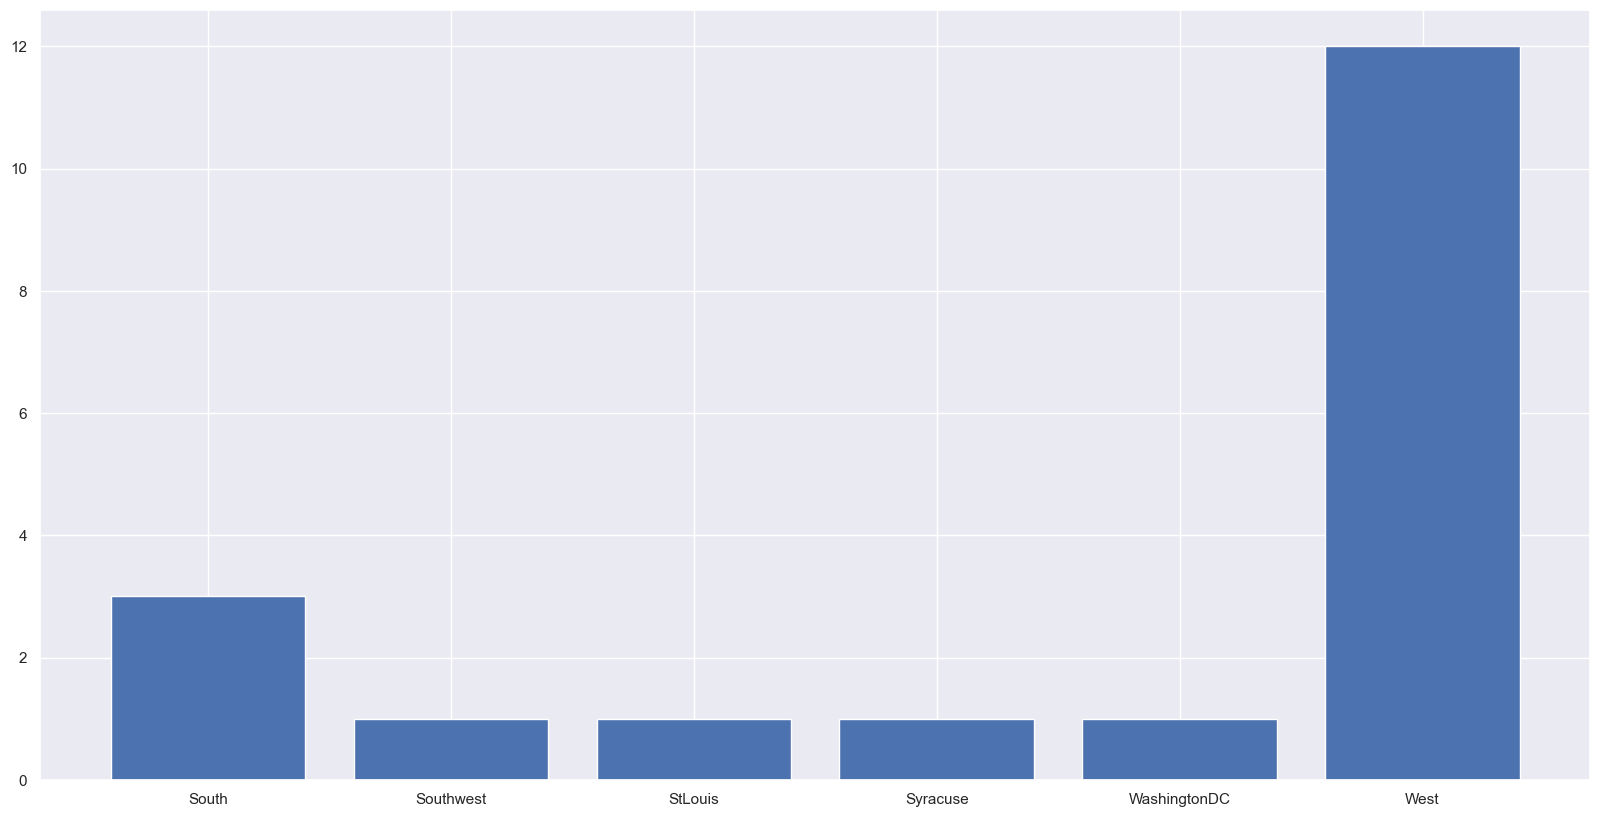

In [303]:
#grafički prikaz broja vrijednosti atributa regionZ za pojedine vrijednosti, vidimo da je West najzastupljeniji
count_per_regionZ = seasons.groupby('regionZ').count().loc[:,'season'].values
regionZ = seasons.groupby('regionZ').count().index.values

plt.bar(regionZ, count_per_regionZ)
plt.show()

In [304]:
seasons.nunique()

season     19
years      19
dayzero    19
regionW     4
regionX     7
regionY     7
regionZ     6
dtype: int64

In [305]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   19 non-null     object
 1   years    19 non-null     object
 2   dayzero  19 non-null     object
 3   regionW  19 non-null     object
 4   regionX  19 non-null     object
 5   regionY  19 non-null     object
 6   regionZ  19 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [306]:
#sezona se predstavlja kao int
le = LabelEncoder()
le.fit(seasons.loc[:,'season'])

seasons.loc[:,'season'] = le.transform(seasons.loc[:,'season'])

In [307]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   19 non-null     int32 
 1   years    19 non-null     object
 2   dayzero  19 non-null     object
 3   regionW  19 non-null     object
 4   regionX  19 non-null     object
 5   regionY  19 non-null     object
 6   regionZ  19 non-null     object
dtypes: int32(1), object(6)
memory usage: 1.1+ KB


In [308]:
seasons.head()

,season,years,dayzero,regionW,regionX,regionY,regionZ
0,0,1995-1996,10/30/1995,East,Midwest,Southeast,West
1,1,1996-1997,10/28/1996,East,Southeast,Midwest,West
2,2,1997-1998,10/27/1997,East,West,Midwest,South
3,3,1998-1999,10/26/1998,East,Midwest,South,West
4,4,1999-2000,11/01/1999,Midwest,West,East,South


In [309]:
seasons.isna().sum()

season     0
years      0
dayzero    0
regionW    0
regionX    0
regionY    0
regionZ    0
dtype: int64

In [310]:
sample_submission.shape

(2278, 2)

In [311]:
sample_submission.head()

,id,pred
0,S_507_509,0
1,S_507_511,0
2,S_507_512,0
3,S_507_521,0
4,S_507_536,0


In [312]:
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(sample_submission)

,id,pred
0,S_507_509,0
1,S_507_511,0
2,S_507_512,0
3,S_507_521,0
4,S_507_536,0
5,S_507_538,0
6,S_507_549,0
7,S_507_553,0
8,S_507_556,0
9,S_507_559,0


In [313]:
sample_submission.columns.values

array(['id', 'pred'], dtype=object)

In [314]:
sample_submission.describe()

,pred
count,2278.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [315]:
sample_submission.nunique()

id      2278
pred       1
dtype: int64

In [316]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2278 non-null   object
 1   pred    2278 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.7+ KB


In [317]:
regular_season_results.shape

(91224, 8)

In [318]:
regular_season_results.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN


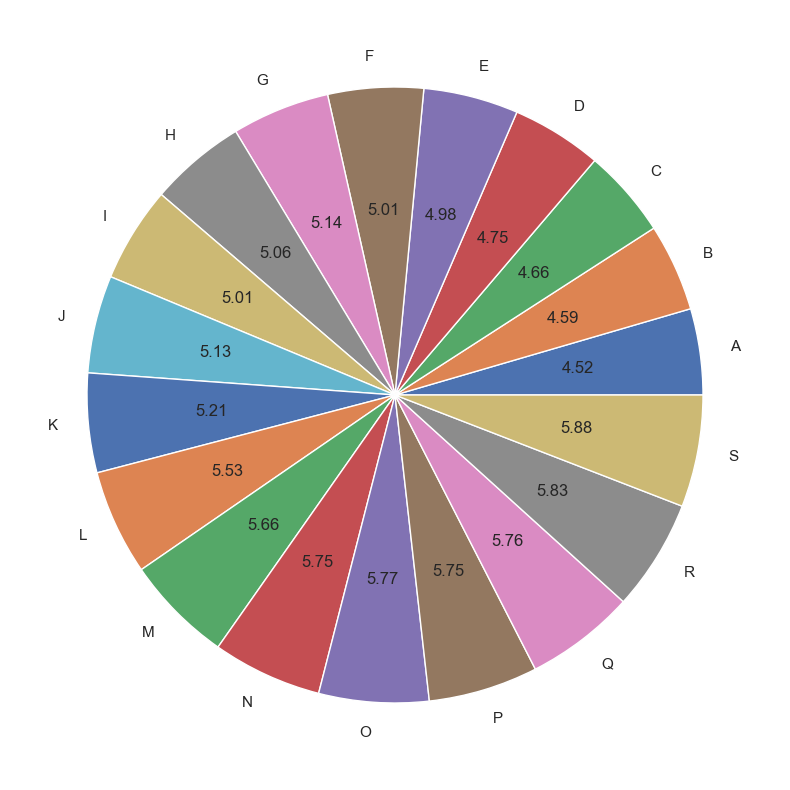

In [319]:
#broj odigranih utakmica po svakoj sezoni prikazan u pitnom grafu
count_per_season = regular_season_results.groupby('season').count().loc[:,'wteam'].values
season = regular_season_results.groupby('season').count().index.values
percent = (count_per_season/len(regular_season_results))*100

plt.pie(percent, labels=season, autopct='%.2f')
plt.show()

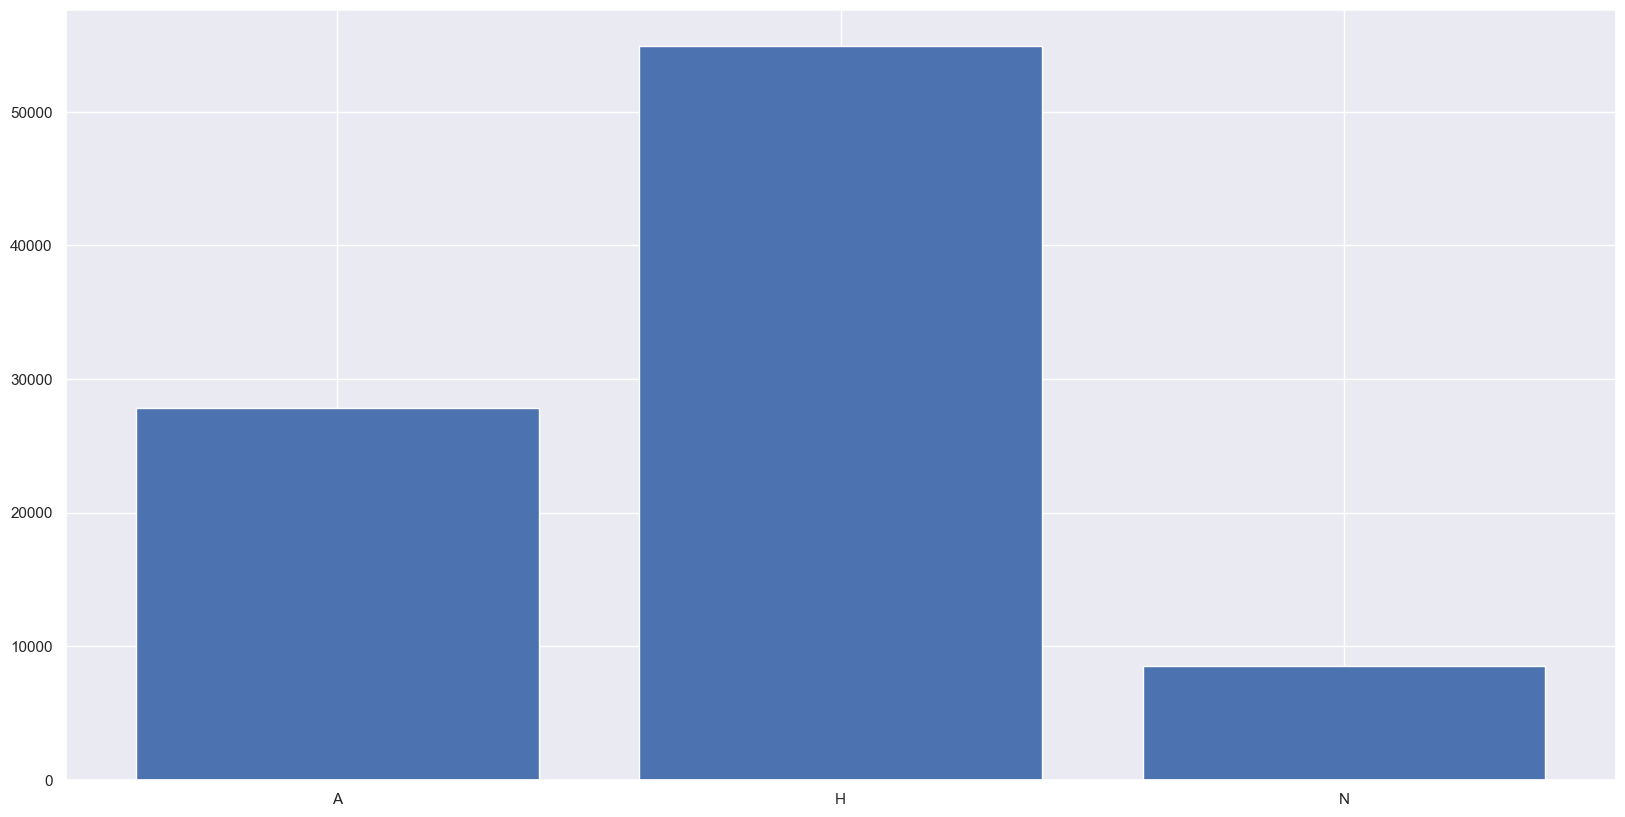

In [320]:
#grafički prikaz wloc atributa (winning team location), vidimo da ima 3 vrijednosti H(home), A(away), N(neutral), također možemo primjetiti da je domaćin najviše puta pobjednik
count_per_wloc = regular_season_results.groupby('wloc').count().loc[:,'wteam'].values
wloc = regular_season_results.groupby('wloc').count().index.values

plt.bar(wloc, count_per_wloc)
plt.show()

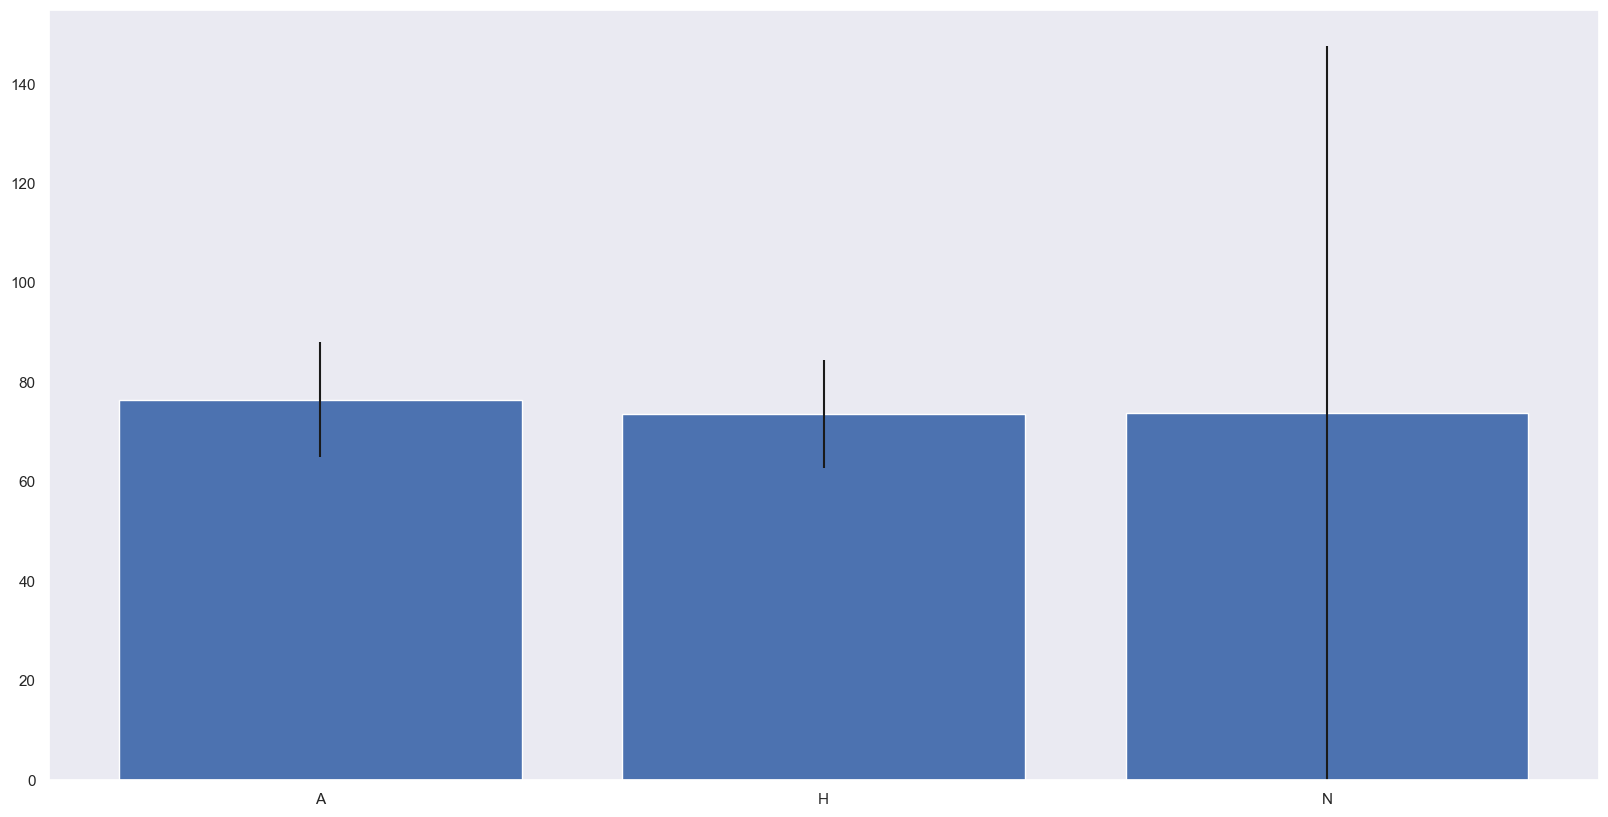

In [321]:
#također grafički prikaz atributa wloc s prosječnim vrijednostima wscorea i standardnom devijacijom
h_mean = regular_season_results.loc[regular_season_results.loc[:,'wloc'] == 'H', 'wscore'].mean()
h_std = regular_season_results.loc[regular_season_results.loc[:,'wloc'] == 'H', 'wscore'].std()
a_mean = regular_season_results.loc[regular_season_results.loc[:,'wloc'] == 'A', 'wscore'].mean()
a_std = regular_season_results.loc[regular_season_results.loc[:,'wloc'] == 'A', 'wscore'].std()
n_mean = regular_season_results.loc[regular_season_results.loc[:,'wloc'] == 'N', 'wscore'].mean()
n_std = regular_season_results.loc[regular_season_results.loc[:,'wloc'] == 'N', 'wscore'].std()

wscore_per_wloc = [h_mean, a_mean, n_mean]
wscore_per_wloc_std = [h_std, a_std, n_mean]

wloc_letter = regular_season_results.groupby('wloc').count().index.values

# plot
plt.bar(wloc_letter, wscore_per_wloc, yerr=wscore_per_wloc_std)
plt.grid()
plt.show()

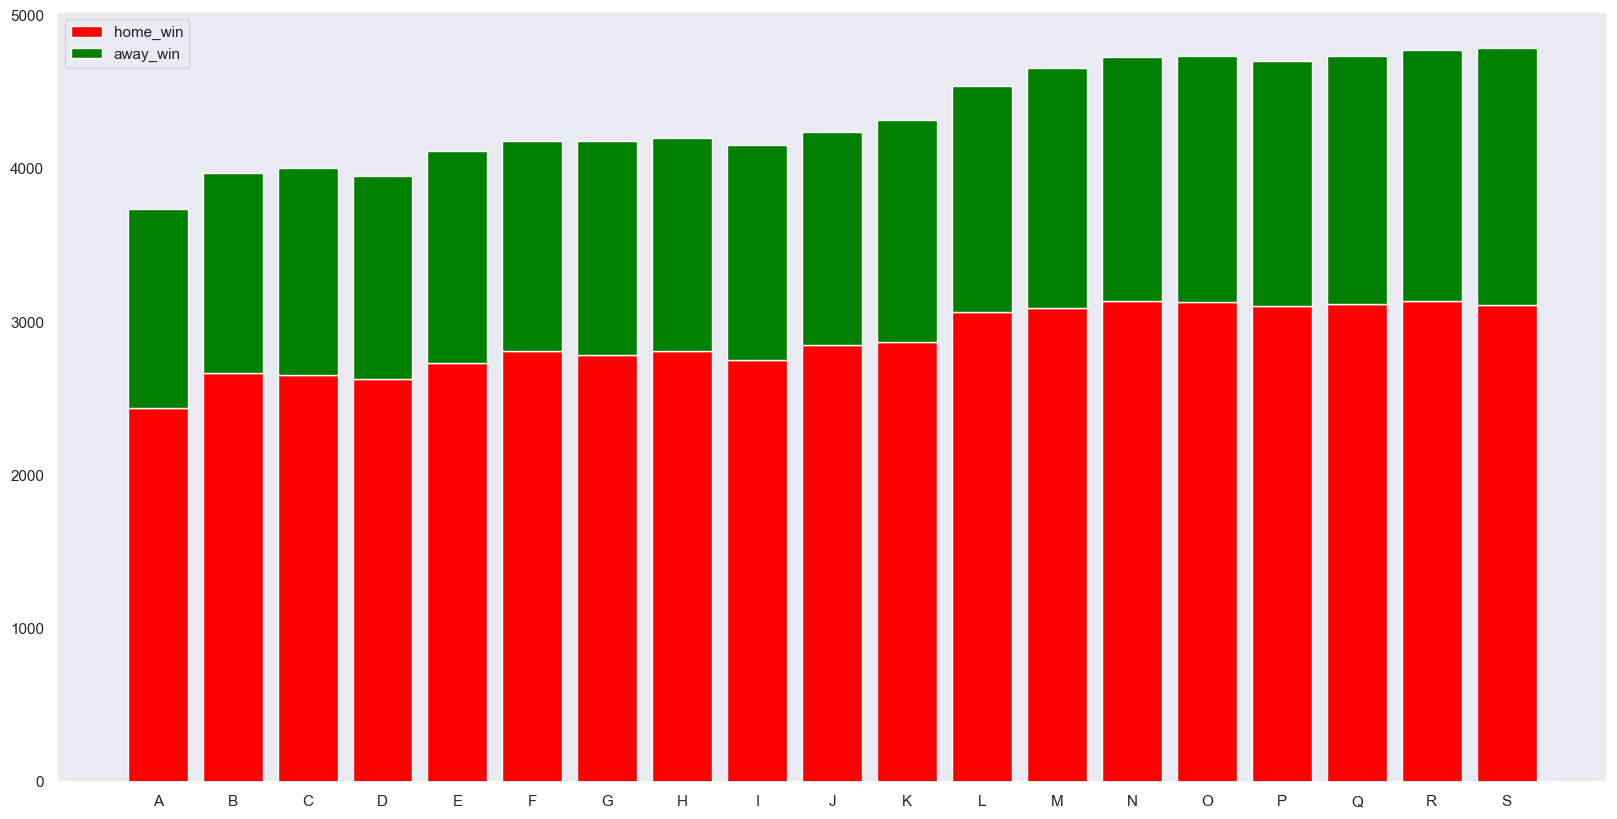

In [322]:
#posloženi dijagram
#grafički prikaz usporedbe pobjeda domaćina i pobjeda gostiju tijekom svake sezone
# mask
mask_home_team_win = regular_season_results.wloc == 'H'
mask_away_team_win = regular_season_results.wloc == 'A'

count_per_season_away_team_win = regular_season_results.loc[mask_away_team_win,:].groupby('season').count().loc[:,'wscore'].values
count_per_season_home_team_win = regular_season_results.loc[mask_home_team_win,:].groupby('season').count().loc[:,'wscore'].values
season = regular_season_results.groupby('season').count().index.values

# plot
plt.bar(season, count_per_season_home_team_win, color='red', label='home_win')
plt.bar(season, count_per_season_away_team_win, color='green', label='away_win', bottom=count_per_season_home_team_win)
plt.legend(loc='best')
plt.grid()
plt.show()

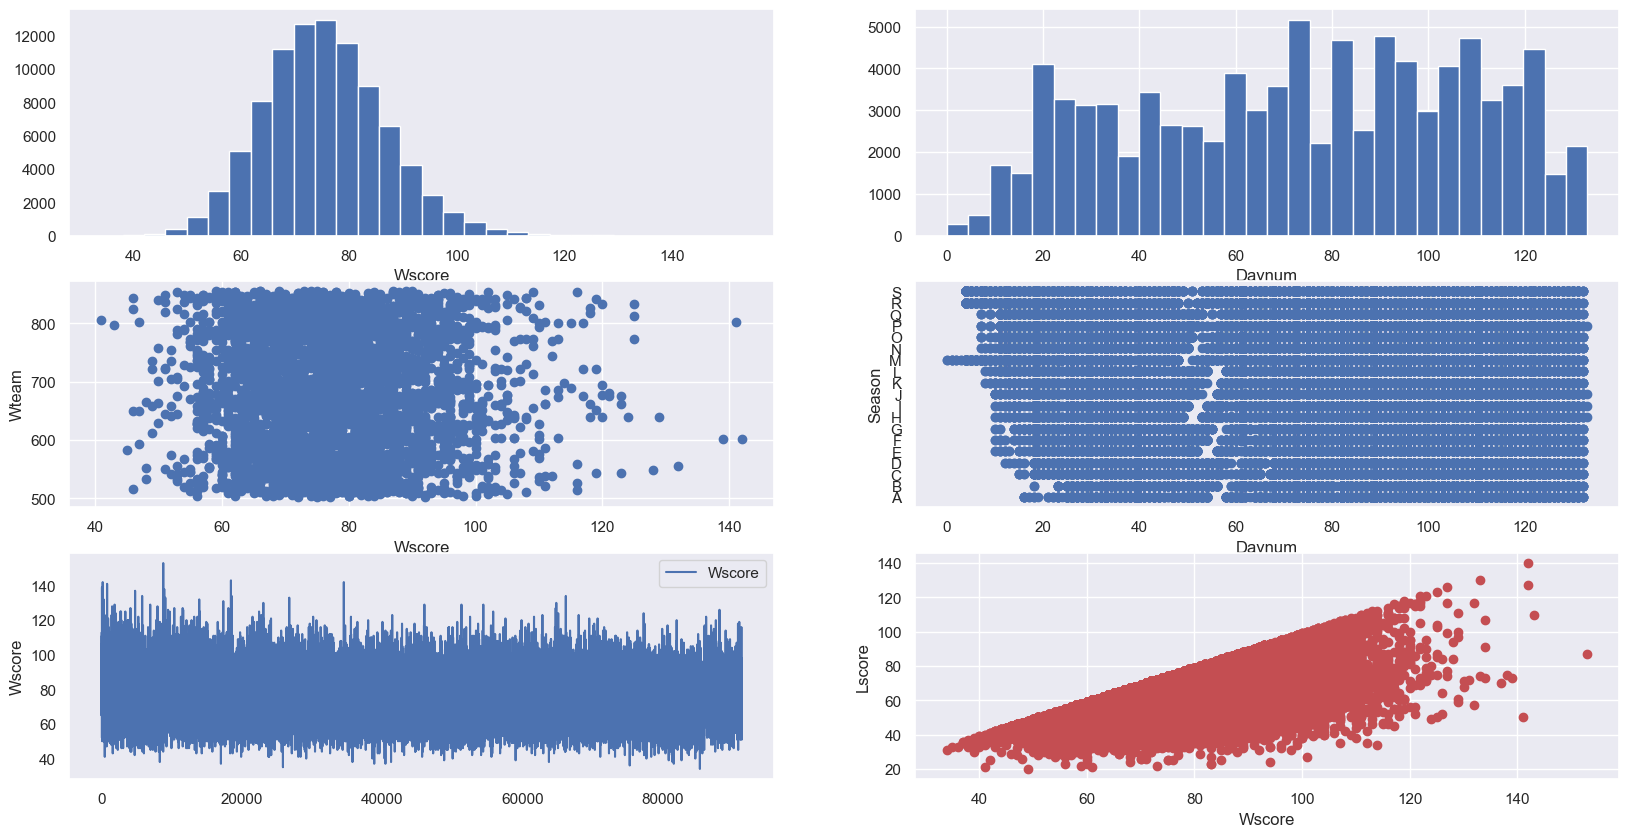

In [323]:
# define axes
fig, ax = plt.subplots(3,2, figsize=(20,10)) 

ax[0,0].hist(regular_season_results.wscore, bins=30)
ax[0,0].grid()
ax[0,0].set_xlabel('Wscore')

ax[1,0].scatter(regular_season_results[regular_season_results['season'] == 'A'].wscore, regular_season_results[regular_season_results['season'] == 'A'].wteam)
ax[1,0].set_xlabel('Wscore')
ax[1,0].set_ylabel('Wteam')

ax[2,0].plot([y for y in range(len(regular_season_results))], regular_season_results.wscore, label='Wscore')
ax[2,0].set_ylabel('Wscore')
ax[2,0].legend(loc='best')
ax[2,0].grid()

ax[0,1].hist(regular_season_results.daynum, bins=30)
ax[0,1].set_xlabel('Daynum')

ax[1,1].scatter(regular_season_results.daynum, regular_season_results.season)
ax[1,1].set_xlabel('Daynum')
ax[1,1].set_ylabel('Season')
ax[1,1].grid()

ax[2,1].scatter(regular_season_results.wscore, regular_season_results.lscore, color='r')
ax[2,1].set_xlabel('Wscore')
ax[2,1].set_ylabel('Lscore')

plt.show()

In [324]:
#nad ovom csv datotekom ćemo objasniti testove

#nulta hipoteza: prve sezone nisu imale veći prosjek zabijenih poena od strane pobjedničke ekipe od novijih sezona
#alternativna hipoteza: prve sezone su imale veći prosjek zabijenih poena od strane pobjedničkih ekipa nego novije sezone
#dakle prvo odvajamo zasebno sezonu A i sezonu R, to su prva i predzadnja sezona, a zatim u varijable _sample stavljamo 100 zapisa, rezultata iz tih sezona

seasonA = regular_season_results.query('season == "A"')
seasonR = regular_season_results.query('season == "R"')

seasonA_sample = seasonA.sample(n=100, random_state=1)
seasonR_sample = seasonR.sample(n=100, random_state=1)

In [325]:
#ovdje vidimo da je prosjek poena pobjedničkih ekipa sezone A, prve sezone, veći za 6 nego predzadnje sezone, R
regular_season_results.groupby('season')['wscore'].mean()

season
A    78.198399
B    76.321403
C    77.229466
D    76.200415
E    76.351387
F    77.187404
G    77.019846
H    75.789998
I    74.973753
J    74.689264
K    74.587555
L    74.829467
M    74.962425
N    74.033721
O    74.652480
P    74.374309
Q    73.379973
R    72.840789
S    76.101268
Name: wscore, dtype: float64

<AxesSubplot:>

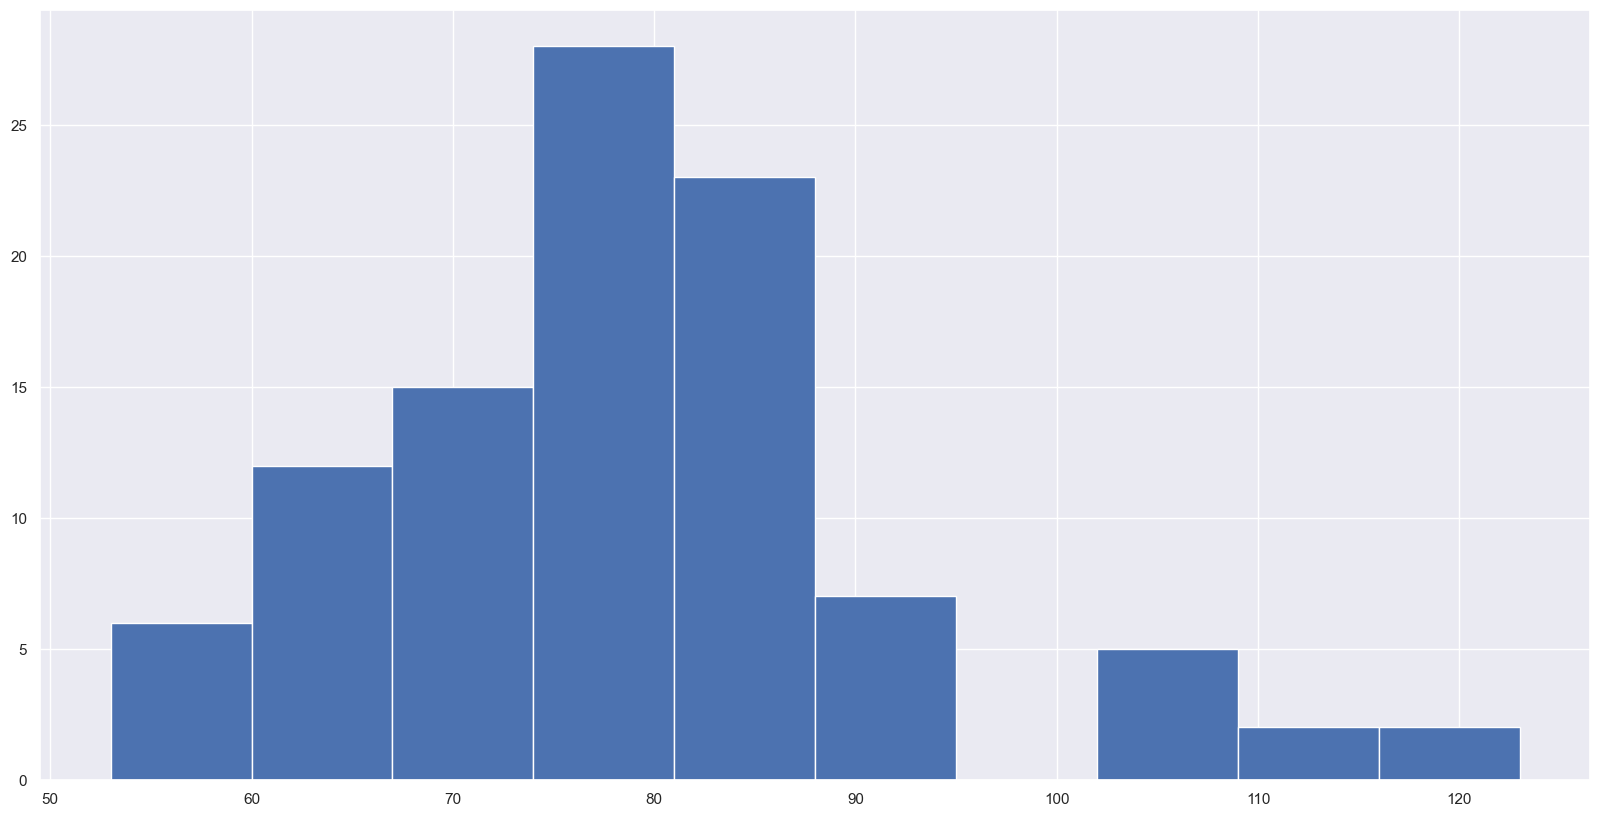

In [326]:
#graf za zabijene poene pobjedničkih ekipa prve sezone
seasonA_sample['wscore'].hist()

<AxesSubplot:>

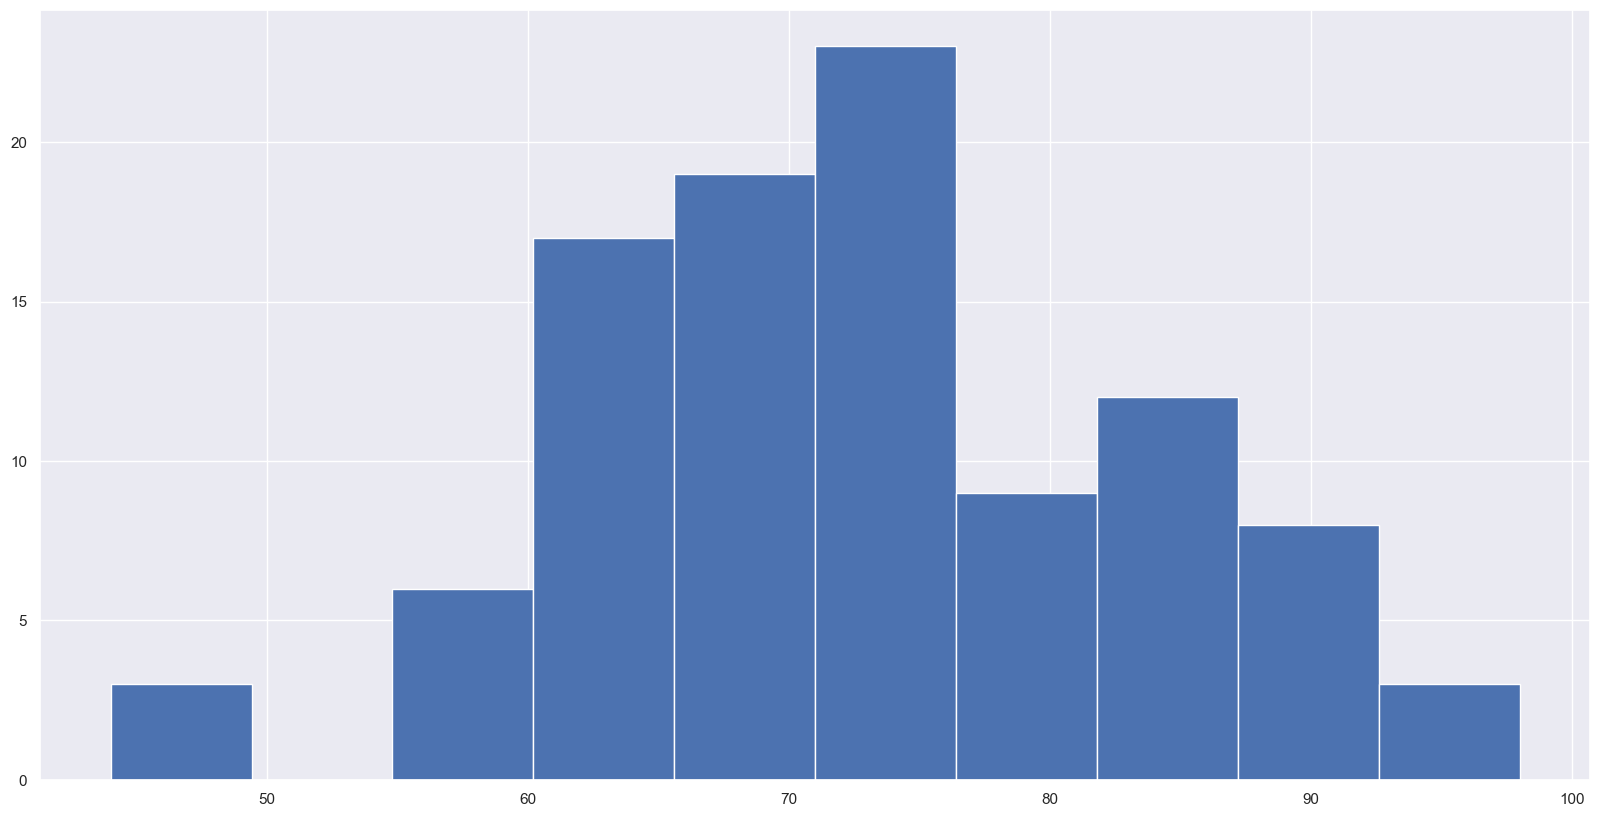

In [327]:
#graf za zabijene poene pobjedničkih ekipa predzadnje sezone
seasonR_sample['wscore'].hist()

In [328]:
#100 puta generiramo 20 nasumicnih redaka i gledamo prosjek zabijenih poena 20 pobjedničkih ekipa za sezonu A i sezonu R
wscore_normal = np.array([np.mean(regular_season_results[regular_season_results["season"]=='A'].sample(20)["wscore"].values) for i in range(100)]) 
seasonA_sample['wscore_normal'] = wscore_normal

wscore_normal_t = np.array([np.mean(regular_season_results[regular_season_results["season"]=='R'].sample(20)["wscore"].values) for i in range(100)]) 
seasonR_sample['wscore_normal'] = wscore_normal_t

<AxesSubplot:>

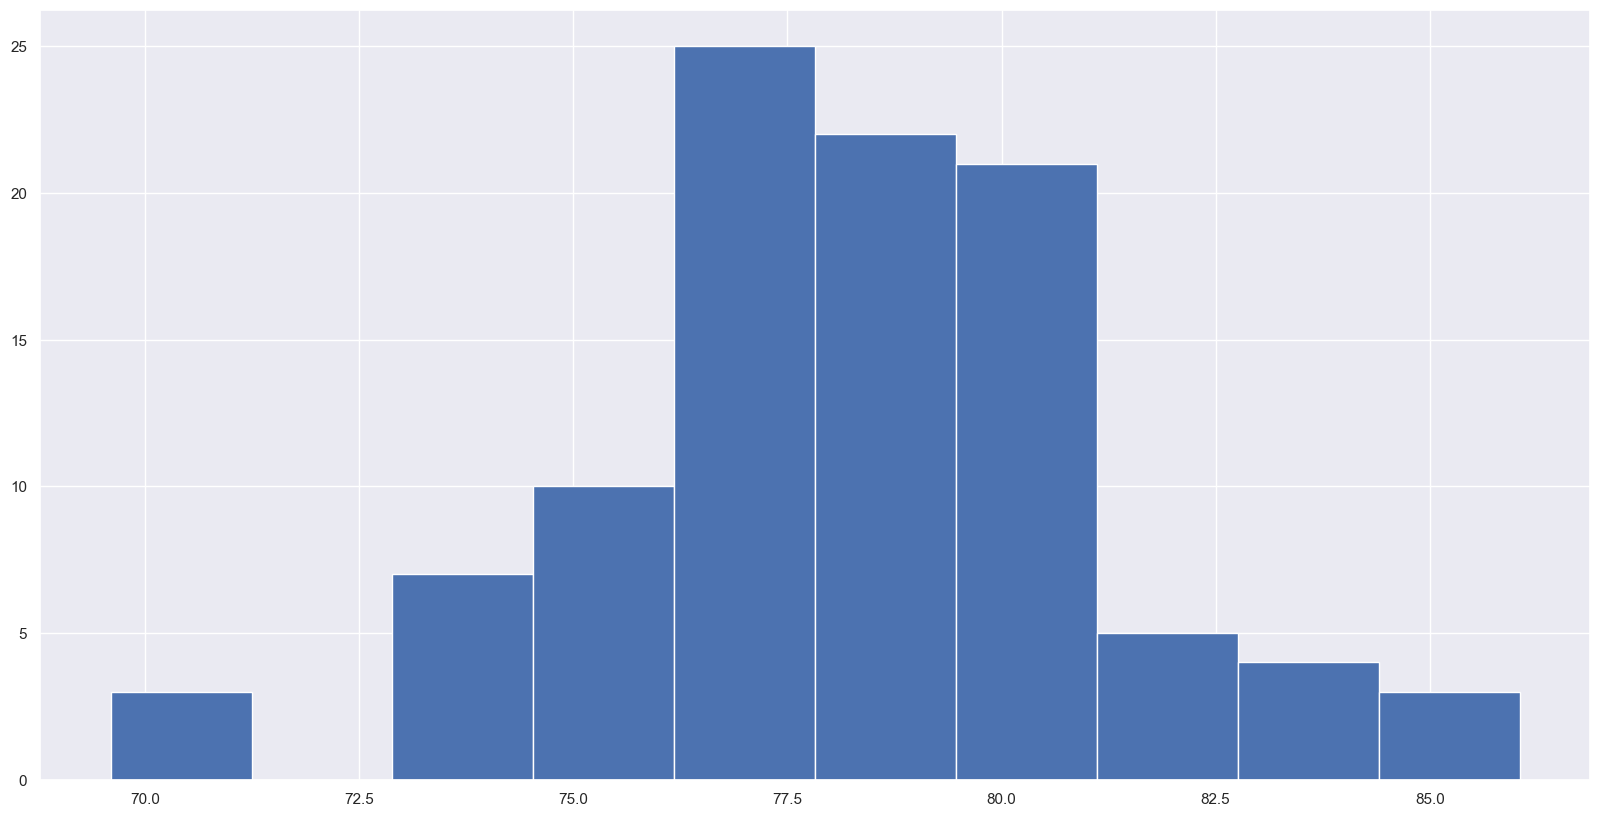

In [329]:
#grafički prikaz prve sezone
seasonA_sample['wscore_normal'].hist()

<AxesSubplot:>

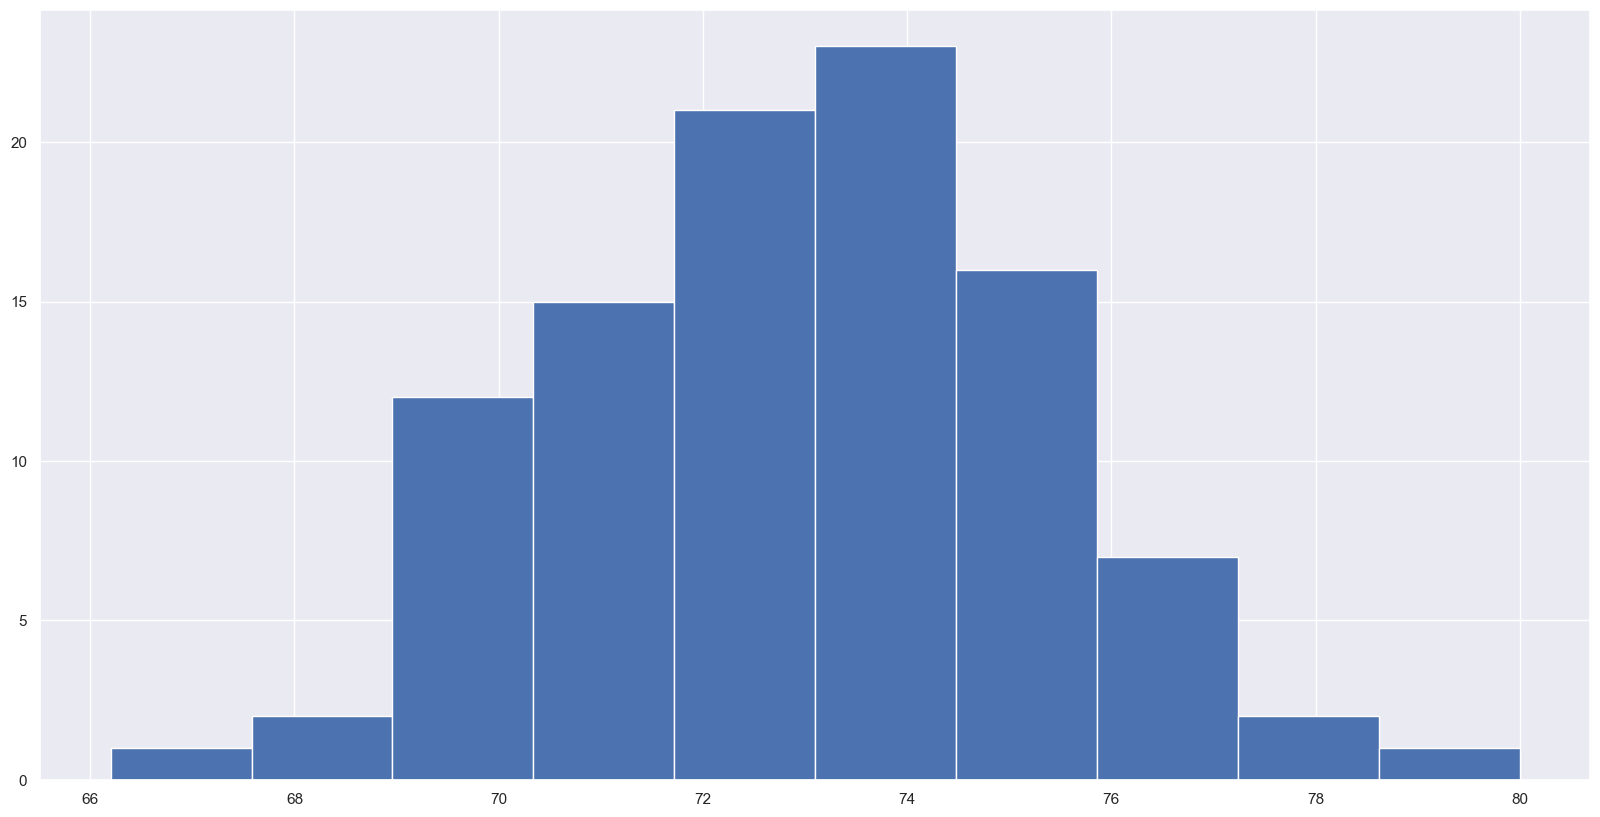

In [330]:
#grafički prikaz predzadnje sezone
seasonR_sample['wscore_normal'].hist()

In [331]:
#two sample Z-test
ztest(seasonA_sample['wscore_normal'], seasonR_sample['wscore_normal'], value=0)

(13.935030293830414, 3.880357182910323e-44)

In [332]:
#one sample Z-test
ztest(seasonA_sample['wscore_normal'], value=0)

(265.9104749558796, 0.0)

In [333]:
#one sample Z-test
ztest(seasonR_sample['wscore_normal'], value=0)

(304.2942344787071, 0.0)

In [334]:
#Homogeneity
stats.levene(seasonA_sample['wscore_normal'],seasonR_sample['wscore_normal'])

LeveneResult(statistic=2.000443398836054, pvalue=0.15882375641303717)

In [335]:
#Analysis of Variance Test (ANOVA)
#testira jesu li aritmetičke sredine dvaju nezavisnih uzoraka značajno različite
stat, p = f_oneway(seasonA_sample['wscore_normal'],seasonR_sample['wscore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=194.185, p=0.000
Probably different distributions


In [336]:
regular_season_results.columns.values

array(['season', 'daynum', 'wteam', 'wscore', 'lteam', 'lscore', 'wloc',
       'numot'], dtype=object)

In [337]:
#s include='all' uključujemo sve atribute describea(retci) bez obzira na tip podatka koji se opisuje
regular_season_results.describe(include='all')

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
count,91224,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,91224,51333.000000
unique,19,NaN,NaN,NaN,NaN,NaN,3,NaN
top,S,NaN,NaN,NaN,NaN,NaN,H,NaN
freq,5362,NaN,NaN,NaN,NaN,NaN,54891,NaN
mean,NaN,73.410133,680.981058,75.370440,677.047400,63.208860,NaN,0.072000
std,NaN,34.210997,103.099502,11.408528,102.950054,10.940295,NaN,0.313278
min,NaN,0.000000,501.000000,34.000000,501.000000,20.000000,NaN,0.000000
25%,NaN,44.000000,592.000000,68.000000,587.000000,56.000000,NaN,0.000000
50%,NaN,75.000000,678.000000,75.000000,675.000000,63.000000,NaN,0.000000
75%,NaN,103.000000,772.000000,83.000000,768.000000,70.000000,NaN,0.000000


In [338]:
regular_season_results.nunique()

season     19
daynum    134
wteam     356
wscore    108
lteam     356
lscore    104
wloc        3
numot       7
dtype: int64

In [339]:
regular_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91224 entries, 0 to 91223
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  91224 non-null  object 
 1   daynum  91224 non-null  int64  
 2   wteam   91224 non-null  int64  
 3   wscore  91224 non-null  int64  
 4   lteam   91224 non-null  int64  
 5   lscore  91224 non-null  int64  
 6   wloc    91224 non-null  object 
 7   numot   51333 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 5.6+ MB


In [341]:
le = LabelEncoder()
le.fit(regular_season_results.loc[:,'season'])

regular_season_results.loc[:,'season'] = le.transform(regular_season_results.loc[:,'season'])

In [342]:
regular_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91224 entries, 0 to 91223
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  91224 non-null  int32  
 1   daynum  91224 non-null  int64  
 2   wteam   91224 non-null  int64  
 3   wscore  91224 non-null  int64  
 4   lteam   91224 non-null  int64  
 5   lscore  91224 non-null  int64  
 6   wloc    91224 non-null  object 
 7   numot   51333 non-null  float64
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 5.2+ MB


In [343]:
regular_season_results.isna().sum()

season        0
daynum        0
wteam         0
wscore        0
lteam         0
lscore        0
wloc          0
numot     39891
dtype: int64

In [387]:
last_season = regular_season_results.loc[regular_season_results.season == 18, :]
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(last_season)

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
85862,18,4,502,79,517,68,N,0.0
85863,18,4,503,72,553,63,H,0.0
85864,18,4,507,74,766,62,A,0.0
85865,18,4,511,73,538,62,H,0.0
85866,18,4,512,96,813,61,H,0.0
85867,18,4,515,99,584,65,H,0.0
85868,18,4,518,76,705,54,H,0.0
85869,18,4,521,72,556,60,N,0.0
85870,18,4,522,87,646,83,A,0.0
85871,18,4,526,116,819,87,H,0.0


In [390]:
winners = pd.DataFrame()
winners['wteam'] = regular_season_results[regular_season_results['season'] == 18]['wteam'].reset_index(drop=True)
display(winners)

,wteam
0,502
1,503
2,507
3,511
4,512
...,...
5357,592
5358,671
5359,779
5360,811


In [344]:
tourney_results.shape

(1156, 7)

In [345]:
tourney_results.head()

,season,daynum,wteam,wscore,lteam,lscore,numot
0,A,136,515,86,729,80,NaN
1,A,136,559,68,555,59,NaN
2,A,136,576,75,666,63,NaN
3,A,136,581,75,577,60,NaN
4,A,136,604,81,551,74,NaN


In [346]:
tourney_results.columns.values

array(['season', 'daynum', 'wteam', 'wscore', 'lteam', 'lscore', 'numot'],
      dtype=object)

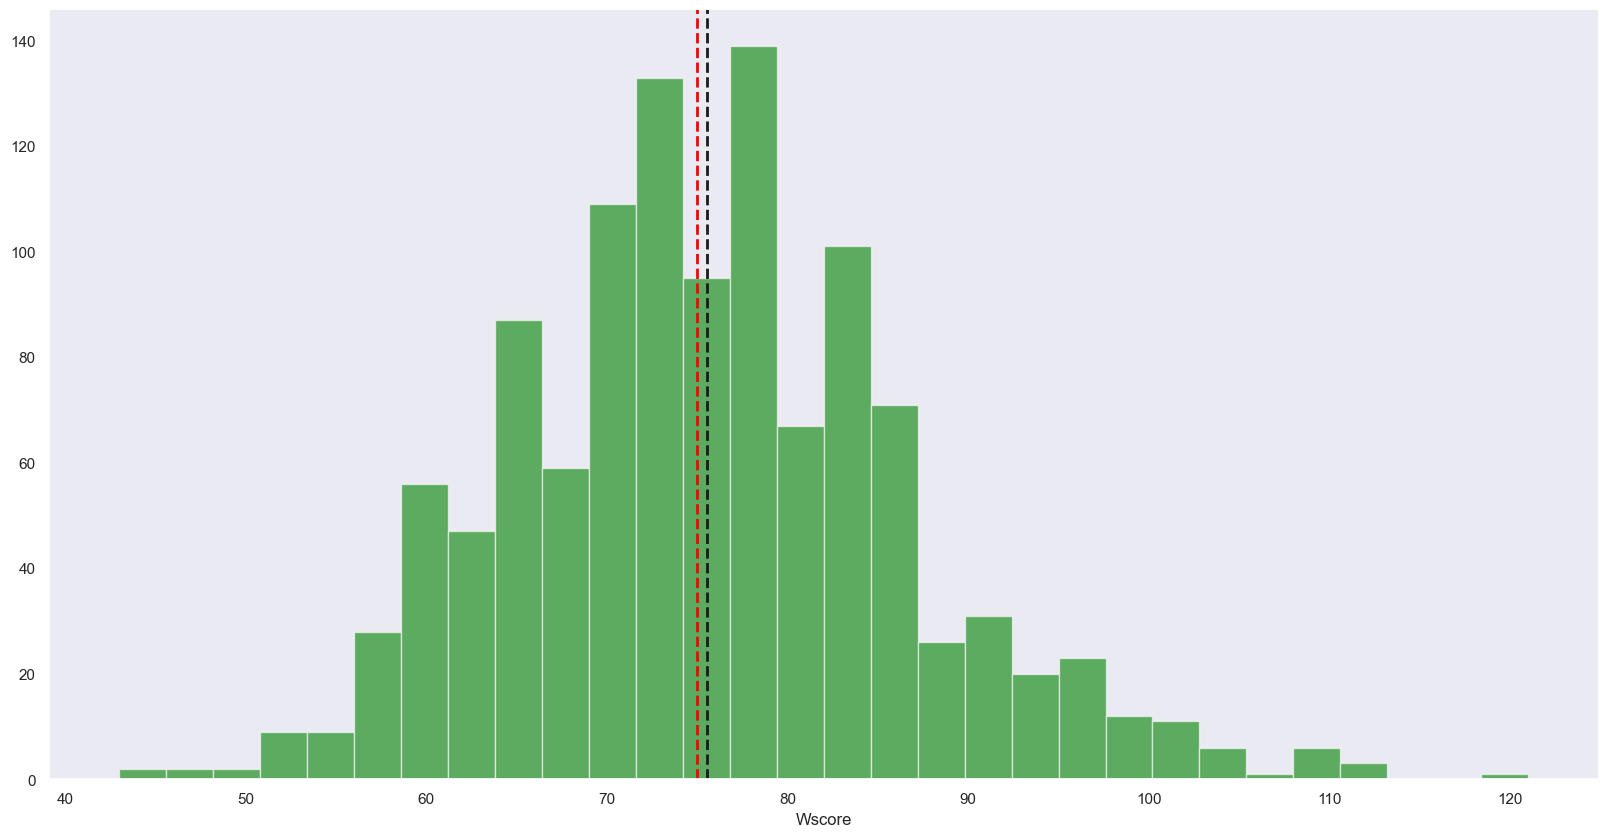

In [347]:
#grafički prikaz zabijenih poena pobjedničke ekipe u datoteci tourney_results.csv, y os je broj ntorki, a x os broj zabijenih poena pobjedničke ekipe
#aritmetička sredina zabijenih poena označena je crvenom iscrtkanom linijom, a medijan crnom
plt.hist(tourney_results.wscore, bins=30, color='green', alpha=0.6)
plt.xlabel('Wscore')
plt.grid()
plt.axvline(tourney_results.wscore.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(tourney_results.wscore.median(), color='red', linestyle='dashed', linewidth=2)

plt.show()

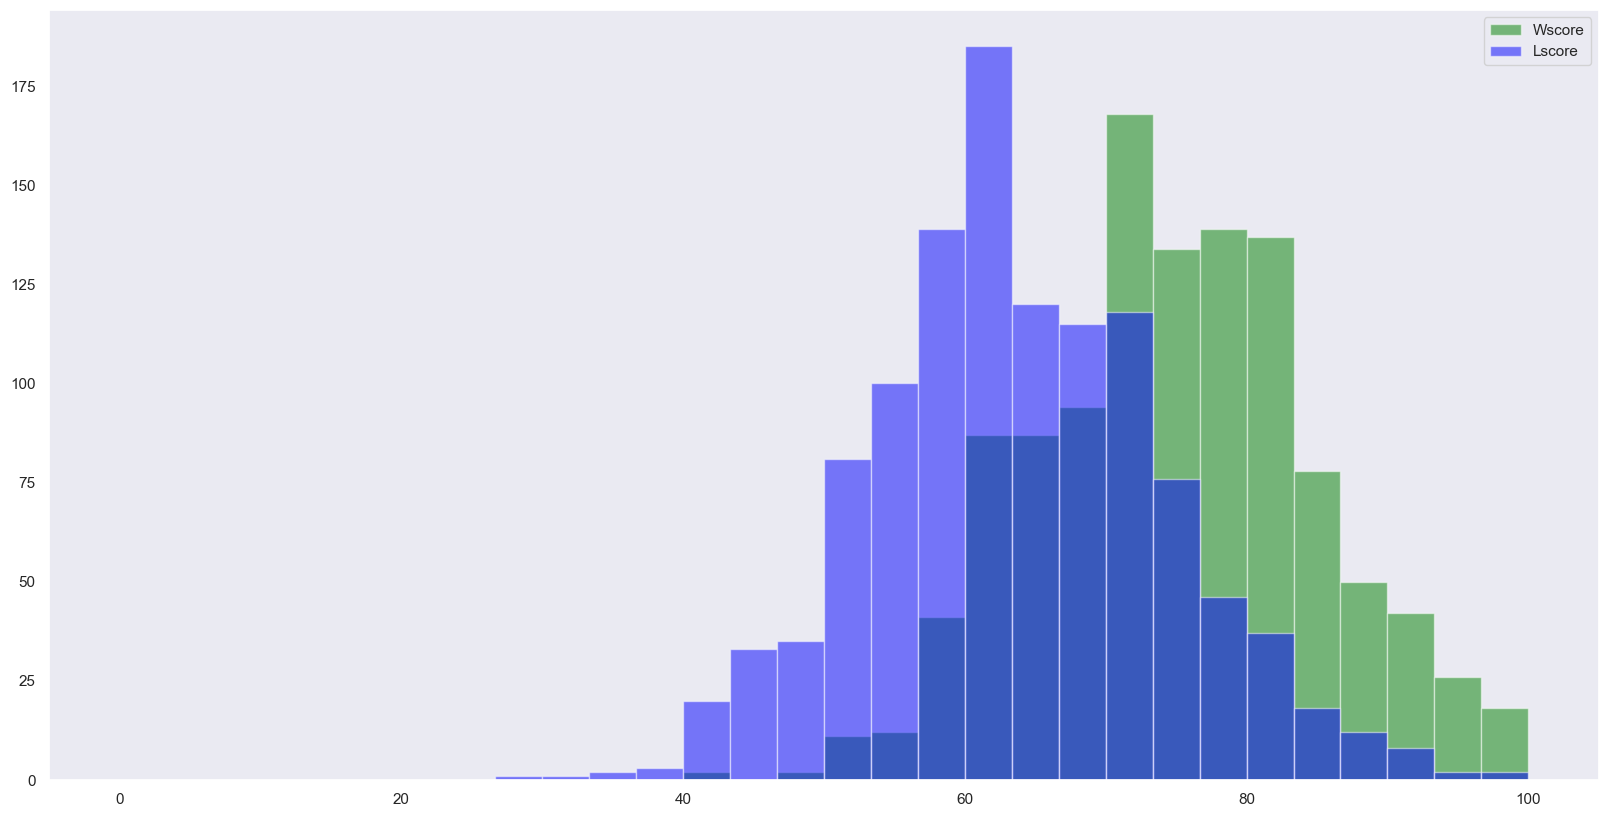

In [348]:
#grafički prikaz zabijenih poena pobjedničkih i gubitničkih ekipa, pobjednici isu zeleni, a gubitnici plavi
plt.hist(tourney_results.wscore, bins=30, range=(0,100), label='Wscore', color='green', alpha=0.5)
plt.hist(tourney_results.lscore, bins=30, range=(0,100), label='Lscore', color='blue', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

In [349]:
tourney_results.describe(include='all')

,season,daynum,wteam,wscore,lteam,lscore,numot
count,1156,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,585.000000
unique,18,NaN,NaN,NaN,NaN,NaN,NaN
top,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,67,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,139.143599,682.515571,75.549308,686.699827,63.667820,0.075214
std,NaN,4.213580,98.684397,10.941410,103.201450,10.567058,0.311565
min,NaN,134.000000,504.000000,43.000000,502.000000,29.000000,0.000000
25%,NaN,136.000000,606.000000,68.000000,603.750000,57.000000,0.000000
50%,NaN,137.000000,671.000000,75.000000,681.500000,63.000000,0.000000
75%,NaN,139.000000,783.000000,82.000000,783.000000,70.000000,0.000000


In [350]:
tourney_results.nunique()

season     18
daynum     12
wteam     155
wscore     67
lteam     258
lscore     66
numot       3
dtype: int64

In [351]:
tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  1156 non-null   object 
 1   daynum  1156 non-null   int64  
 2   wteam   1156 non-null   int64  
 3   wscore  1156 non-null   int64  
 4   lteam   1156 non-null   int64  
 5   lscore  1156 non-null   int64  
 6   numot   585 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 63.3+ KB


In [352]:
le = LabelEncoder()
le.fit(tourney_results.loc[:,'season'])

tourney_results.loc[:,'season'] = le.transform(tourney_results.loc[:,'season'])

In [353]:
tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  1156 non-null   int32  
 1   daynum  1156 non-null   int64  
 2   wteam   1156 non-null   int64  
 3   wscore  1156 non-null   int64  
 4   lteam   1156 non-null   int64  
 5   lscore  1156 non-null   int64  
 6   numot   585 non-null    float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 58.8 KB


In [354]:
#nedostajući podaci
tourney_results.isna().sum()

season      0
daynum      0
wteam       0
wscore      0
lteam       0
lscore      0
numot     571
dtype: int64

In [355]:
tourney_seeds.shape

(1242, 3)

In [356]:
tourney_seeds.head()

,season,seed,team
0,A,W01,663
1,A,W02,603
2,A,W03,796
3,A,W04,660
4,A,W05,729


In [357]:
tourney_seeds.columns.values

array(['season', 'seed', 'team'], dtype=object)

In [358]:
tourney_seeds.describe(include='all')

,season,seed,team
count,1242,1242,1242.000000
unique,19,86,NaN
top,S,W01,NaN
freq,68,19,NaN
mean,NaN,NaN,685.844605
std,NaN,NaN,103.133122
min,NaN,NaN,502.000000
25%,NaN,NaN,603.000000
50%,NaN,NaN,680.000000
75%,NaN,NaN,783.000000


In [359]:
tourney_seeds.nunique()

season     19
seed       86
team      262
dtype: int64

In [360]:
tourney_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  1242 non-null   object
 1   seed    1242 non-null   object
 2   team    1242 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 29.2+ KB


In [361]:
le = LabelEncoder()
le.fit(tourney_seeds.loc[:,'season'])

tourney_seeds.loc[:,'season'] = le.transform(tourney_seeds.loc[:,'season'])

le.fit(tourney_seeds.loc[:,'seed'])

tourney_seeds.loc[:,'seed'] = le.transform(tourney_seeds.loc[:,'seed'])

In [362]:
tourney_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   season  1242 non-null   int32
 1   seed    1242 non-null   int32
 2   team    1242 non-null   int64
dtypes: int32(2), int64(1)
memory usage: 19.5 KB


In [363]:
tourney_seeds.isna().sum()

season    0
seed      0
team      0
dtype: int64

In [364]:
tourney_slots.shape

(1223, 4)

In [365]:
tourney_slots.head()

,season,slot,strongseed,weakseed
0,A,R1W1,W01,W16
1,A,R1W2,W02,W15
2,A,R1W3,W03,W14
3,A,R1W4,W04,W13
4,A,R1W5,W05,W12


In [366]:
tourney_slots.columns.values

array(['season', 'slot', 'strongseed', 'weakseed'], dtype=object)

In [367]:
tourney_slots.describe(include='all')

,season,slot,strongseed,weakseed
count,1223,1223,1223,1223
unique,19,74,74,74
top,S,R1W1,W01,W16
freq,67,19,19,19


In [368]:
tourney_slots.nunique()

season        19
slot          74
strongseed    74
weakseed      74
dtype: int64

In [369]:
tourney_slots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      1223 non-null   object
 1   slot        1223 non-null   object
 2   strongseed  1223 non-null   object
 3   weakseed    1223 non-null   object
dtypes: object(4)
memory usage: 38.3+ KB


In [375]:
le = LabelEncoder()
le.fit(tourney_slots.loc[:,'season'])

tourney_slots.loc[:,'season'] = le.transform(tourney_slots.loc[:,'season'])

le.fit(tourney_slots.loc[:,'strongseed'])

tourney_slots.loc[:,'strongseed'] = le.transform(tourney_slots.loc[:,'strongseed'])

le.fit(tourney_slots.loc[:,'slot'])

tourney_slots.loc[:,'slot'] = le.transform(tourney_slots.loc[:,'slot'])

le.fit(tourney_slots.loc[:,'weakseed'])

tourney_slots.loc[:,'weakseed'] = le.transform(tourney_slots.loc[:,'weakseed'])

In [371]:
tourney_slots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      1223 non-null   int32 
 1   slot        1223 non-null   int32 
 2   strongseed  1223 non-null   int32 
 3   weakseed    1223 non-null   object
dtypes: int32(3), object(1)
memory usage: 24.0+ KB


In [372]:
tourney_slots.head()

,season,slot,strongseed,weakseed
0,0,0,31,W16
1,0,1,32,W15
2,0,2,33,W14
3,0,3,34,W13
4,0,4,35,W12


In [373]:
tourney_slots.isna().sum()

season        0
slot          0
strongseed    0
weakseed      0
dtype: int64

In [374]:
with pd.option_context("display.max_rows", None, 'display.max_columns', None):
    display(tourney_slots)

,season,slot,strongseed,weakseed
0,0,0,31,W16
1,0,1,32,W15
2,0,2,33,W14
3,0,3,34,W13
4,0,4,35,W12
5,0,5,36,W11
6,0,6,37,W10
7,0,7,38,W09
8,0,8,41,X16
9,0,9,42,X15
